In [1]:
library(tidyverse)
library(plyr)
library(modeest)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(gridExtra)
library(factoextra)
library(cluster)
library(BBmisc)
library(heatmaply)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Registered S3 method overwritten b

In [2]:
path = "../input/hepatitis/hepatitis.csv"
columns = c("class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology")
data = read.csv(path, header = F, sep=",", col.names = columns)

In [3]:
head(data)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
4,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [4]:
tail(data)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
150,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.0,?,2
151,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
152,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
153,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
154,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
155,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [5]:
# inspección rápida de los datos
summary(data)

     class            age            sex        steroid   antivirals    fatigue
 Min.   :1.000   Min.   : 7.0   Min.   :1.000   ?: 1    Min.   :1.000   ?:  1  
 1st Qu.:2.000   1st Qu.:32.0   1st Qu.:1.000   1:76    1st Qu.:2.000   1:100  
 Median :2.000   Median :39.0   Median :1.000   2:78    Median :2.000   2: 54  
 Mean   :1.794   Mean   :41.2   Mean   :1.103           Mean   :1.845          
 3rd Qu.:2.000   3rd Qu.:50.0   3rd Qu.:1.000           3rd Qu.:2.000          
 Max.   :2.000   Max.   :78.0   Max.   :2.000           Max.   :2.000          
                                                                               
 malaise anorexia liver_big liver_firm spleen_palpable spiders ascites varices
 ?: 1    ?:  1    ?: 10     ?:11       ?:  5           ?: 5    ?:  5   ?:  5  
 1:61    1: 32    1: 25     1:60       1: 30           1:51    1: 20   1: 18  
 2:93    2:122    2:120     2:84       2:120           2:99    2:130   2:132  
                                            

In [6]:
# revisamos el tipo de datos del df generado
str(data)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 3 levels "?","1","2": 2 2 3 1 3 3 2 3 3 3 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 3 levels "?","1","2": 3 2 2 3 3 3 2 3 2 3 ...
 $ malaise        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ anorexia       : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ liver_big      : Factor w/ 3 levels "?","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ liver_firm     : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 2 3 ...
 $ spleen_palpable: Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ spiders        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ ascites        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ varices        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3

In [7]:
#Número de filas
nrow(data)

[1] 155

In [8]:
#Número de columnas
ncol(data)

[1] 20

In [9]:
# Estadística descriptiva
library(ggplot2)

In [10]:
convertToNumeric <- function(col){
    col <- as.numeric(levels(col))[col]
    return (col)
}

In [11]:
convertToInt <- function(col){
    col <- as.integer(levels(col))[col]
    return (col)
}

In [12]:
parsingNA <- function(col){
     if(is.factor(col)){
        col <- revalue(col, c("?" = NA))
     }
    if(nlevels(col) > 2){
        col <- as.numeric(levels(col))[col]
    }
    return (col)
}

In [13]:
# Creamos un backup
dataHip <- data

In [14]:
# Recorremos cada columna para reemplazar los símbolos ? y dejarlos como NA
# Esto con el objeto de que Mice pueda reeconocer los datos perdidos y aplicar los métodos correspondientes.
for(i in names(dataHip)){
  dataHip[[i]] <- parsingNA(dataHip[[i]])
}

In [15]:
#Chequeamos la cantidad de datos perdidos
colSums(is.na(dataHip))

class             age             sex         steroid      antivirals 
              0               0               0               1               0 
        fatigue         malaise        anorexia       liver_big      liver_firm 
              1               1               1              10              11 
spleen_palpable         spiders         ascites         varices       bilirubin 
              5               5               5               5               6 
  alk_phosphate            sgot         albumin         protime       histology 
             29               4              16              67               0

In [16]:
str(dataHip)
#Vemos que los niveles de los factor han disminuido, conforme a la transformación.

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 NA 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0

In [17]:
# Aplicamos la imputación
# Poster
library(mice)
init = mice(dataHip, maxit=0) 
meth = init$method
# Descartamos estos atributos para la imputación
meth[c("age", "class", "sex", "antivirals", "histology")]=""
# Se aplica método de regresión logística para atributos con 2 niveles
meth[c("steroid", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices")]="logreg"
# Se aplica método de regresión logística politómica
meth[c("bilirubin", "alk_phosphate", "sgot", "albumin", "protime")]="norm"
predM = init$predictorMatrix
set.seed(103)
imputed = mice(dataHip, method=meth, predictorMatrix=predM, m=5)


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   2  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   3  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   4  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   5  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   2 

In [18]:
dataImputed <- complete(imputed)
dataImputedNonConverted <- dataImputed

In [19]:
str(dataImputed)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.

In [20]:
# Convertimos los atributos que son categóricos a enteros
for(i in names(dataImputed)){
  if(is.factor(dataImputed[[i]])){
      dataImputed[[i]] <- convertToInt(dataImputed[[i]])
  }
}

In [21]:
str(dataImputed)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : int  1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : int  2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : int  2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : int  2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: int  2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : int  2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.7 0.7 1 ...
 $ alk_phosphate  : num  85 135 96 46 61.6 ...
 $ sgot           : num  18 42 32 52 200 ...
 $ albumin        : num  4 3.5 4 4 4 ...
 $ protime        : num  46.2 77.4 40.5 80 70.9 ...
 $ histology      : int  1 1 1 1 

In [22]:
colSums(is.na(dataImputed))

class             age             sex         steroid      antivirals 
              0               0               0               0               0 
        fatigue         malaise        anorexia       liver_big      liver_firm 
              0               0               0               0               0 
spleen_palpable         spiders         ascites         varices       bilirubin 
              0               0               0               0               0 
  alk_phosphate            sgot         albumin         protime       histology 
              0               0               0               0               0

In [23]:
datos <- dataImputed

In [24]:
head(datos)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0000,18,4.0,46.22182,1
2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0000,42,3.5,77.44621,1
3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0000,32,4.0,40.50593,1
4,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0000,52,4.0,80.00000,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,61.6434,200,4.0,70.87725,1
6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0000,28,4.0,75.00000,1


In [25]:
summary(datos)

     class            age            sex           steroid       antivirals   
 Min.   :1.000   Min.   : 7.0   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:32.0   1st Qu.:1.000   1st Qu.:1.00   1st Qu.:2.000  
 Median :2.000   Median :39.0   Median :1.000   Median :2.00   Median :2.000  
 Mean   :1.794   Mean   :41.2   Mean   :1.103   Mean   :1.51   Mean   :1.845  
 3rd Qu.:2.000   3rd Qu.:50.0   3rd Qu.:1.000   3rd Qu.:2.00   3rd Qu.:2.000  
 Max.   :2.000   Max.   :78.0   Max.   :2.000   Max.   :2.00   Max.   :2.000  
    fatigue         malaise         anorexia       liver_big    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :2.000  
 Mean   :1.355   Mean   :1.606   Mean   :1.787   Mean   :1.813  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :

In [26]:
library(EnvStats)
test <- rosnerTest(datos$bilirubin,
  k = 20
)
test


Attaching package: ‘EnvStats’


The following object is masked from ‘package:modeest’:

    skewness


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default


Warning message in rosnerTest(datos$bilirubin, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$bilirubin

Sample Size:                     155

Test Statistics:                 R.1  = 5.320288
                                 R.2  = 5.554433
                                 R.3  = 3.691563
                                 R.4  = 3.625848
                                 R.5  = 3.590687
                                 R.6  = 3.769319
                                 R.7  = 3.977589
                                 R.8  = 4.224720
                                 R.9  = 3.990219
                                 R.10 = 4.102421
                                 R.11 = 4.081126
                                 R.12 = 3.722261
                                 R.13 = 3.432732
                                 R.14 = 3.598346
                                 R.15 = 3.428200
                       

In [27]:
library(EnvStats)
test <- rosnerTest(datos$sgot,
  k = 20
)
test

Warning message in rosnerTest(datos$sgot, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$sgot

Sample Size:                     155

Test Statistics:                 R.1  = 6.263008
                                 R.2  = 5.736194
                                 R.3  = 4.930523
                                 R.4  = 3.153074
                                 R.5  = 3.159508
                                 R.6  = 3.248100
                                 R.7  = 3.033284
                                 R.8  = 3.017893
                                 R.9  = 3.127175
                                 R.10 = 3.039787
                                 R.11 = 3.074542
                                 R.12 = 3.151979
                                 R.13 = 3.258806
                                 R.14 = 2.880878
                                 R.15 = 2.853068
                            

In [28]:
library(EnvStats)
test <- rosnerTest(datos$albumin,
  k = 5
)
test


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$albumin

Sample Size:                     155

Test Statistics:                 R.1 = 3.949319
                                 R.2 = 2.771583
                                 R.3 = 2.688216
                                 R.4 = 2.473066
                                 R.5 = 2.452201

Test Statistic Parameter:        k = 5

Alternative Hypothesis:          Up to 5 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     1

  i   Mean.i      SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 3.830873 0.6505240   6.4     106 3.949319   3.527322    TRUE
2 1 3.814190 0.6184879   2.1     105 2.771583   3.525291   FALSE
3 2 3.825394 0.6046368   2.2     132 2.688216   3.523245   FALSE
4 3 3.836088 0.5919422

In [29]:
test <- rosnerTest(datos$protime,
  k = 5
)
test


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$protime

Sample Size:                     155

Test Statistics:                 R.1 = 2.733769
                                 R.2 = 2.391927
                                 R.3 = 2.387278
                                 R.4 = 2.247274
                                 R.5 = 2.227083

Test Statistic Parameter:        k = 5

Alternative Hypothesis:          Up to 5 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     0

  i   Mean.i     SD.i      Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 61.71044 26.16909 133.250713     106 2.733769   3.527322   FALSE
2 1 61.24589 25.60526   0.000000     131 2.391927   3.525291   FALSE
3 2 61.64619 25.20125   1.483784     121 2.387278   3.523245   FALSE
4 3 62

In [30]:
test <- rosnerTest(datos$alk_phosphate,
  k = 20
)
test

Warning message in rosnerTest(datos$alk_phosphate, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$alk_phosphate

Sample Size:                     155

Test Statistics:                 R.1  = 3.394191
                                 R.2  = 3.332470
                                 R.3  = 3.395158
                                 R.4  = 3.057528
                                 R.5  = 2.896541
                                 R.6  = 2.719074
                                 R.7  = 2.792904
                                 R.8  = 2.815623
                                 R.9  = 2.626053
                                 R.10 = 2.699953
                                 R.11 = 2.664134
                                 R.12 = 2.653350
                                 R.13 = 2.639487
                                 R.14 = 2.590913
                                 R.15 = 2.520410
                   

In [31]:
test <- rosnerTest(datos$age,
  k = 20
)
test

Warning message in rosnerTest(datos$age, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            datos$age

Sample Size:                     155

Test Statistics:                 R.1  = 2.928566
                                 R.2  = 2.772680
                                 R.3  = 2.573681
                                 R.4  = 2.470387
                                 R.5  = 2.443883
                                 R.6  = 2.326388
                                 R.7  = 2.288536
                                 R.8  = 2.247427
                                 R.9  = 2.202950
                                 R.10 = 2.061648
                                 R.11 = 2.099918
                                 R.12 = 2.044803
                                 R.13 = 2.082782
                                 R.14 = 2.122962
                                 R.15 = 2.066426
                             

In [32]:
datos = filter(datos, bilirubin < 5 & sgot < 420 & albumin < 6.4)

### Normalización de los datos

In [33]:
# 0.13 máximo
#datos.scaled = scale(datos[c(1:20)])
datos.scaled = normalize(datos, method = "standardize")
#datos.scaled = percentize(datos)

In [34]:
head(datos.scaled)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3239437,1,0,1,1,1,1,0,1,1,1,1,1,0.1826090,0.22014802,0.01515152,0.59375,0.4189585,0
2,1,0.6056338,0,0,1,0,1,1,0,1,1,1,1,1,0.1610988,0.40582706,0.10606061,0.43750,0.7019791,0
3,1,1.0000000,0,1,1,0,1,1,1,1,1,1,1,1,0.1180782,0.26099740,0.06818182,0.59375,0.3671492,0
4,1,0.3380282,0,1,0,1,1,1,1,1,1,1,1,1,0.1180782,0.07531836,0.14393939,0.59375,0.7251269,0
5,1,0.3802817,0,1,1,1,1,1,1,1,1,1,1,1,0.1826090,0.13341140,0.70454545,0.59375,0.6424375,0
6,1,0.3802817,0,1,1,1,1,1,1,1,1,1,1,1,0.1610988,0.25728382,0.05303030,0.59375,0.6798064,0


In [35]:
summary(datos.scaled)

     class             age              sex            steroid      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.3521   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.4507   Median :0.0000   Median :1.0000  
 Mean   :0.8108   Mean   :0.4810   Mean   :0.1014   Mean   :0.5135  
 3rd Qu.:1.0000   3rd Qu.:0.6056   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   antivirals        fatigue          malaise          anorexia     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :1.0000   Median :0.0000   Median :1.0000   Median :1.0000  
 Mean   :0.8378   Mean   :0.3649   Mean   :0.6216   Mean   :0.8108  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   liver_big        liver_firm    

### Buscando un K apropiado

Métodos propuestos por el ayudante

Elbow Method (método del codo)

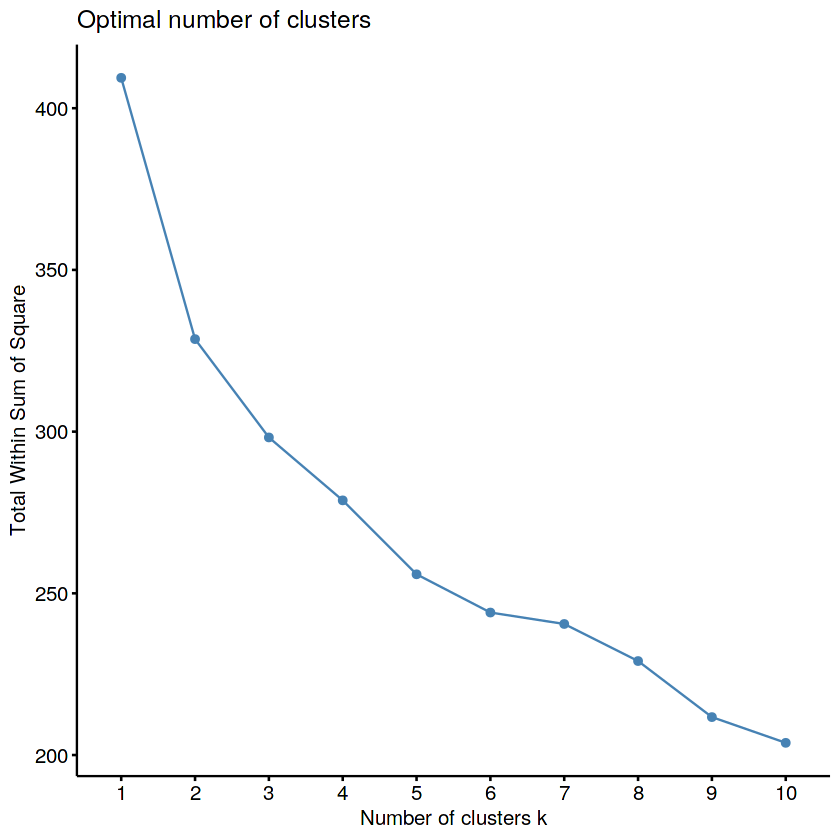

In [36]:
fviz_nbclust(datos.scaled, kmeans, method = "wss")

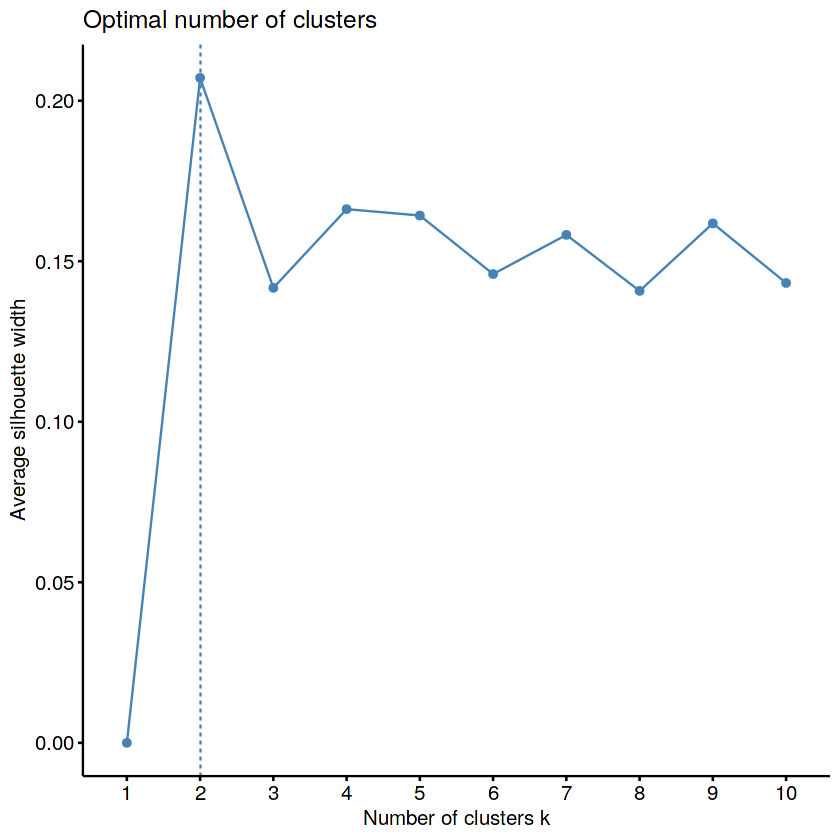

In [37]:
fviz_nbclust(datos.scaled, kmeans, method = "silhouette")

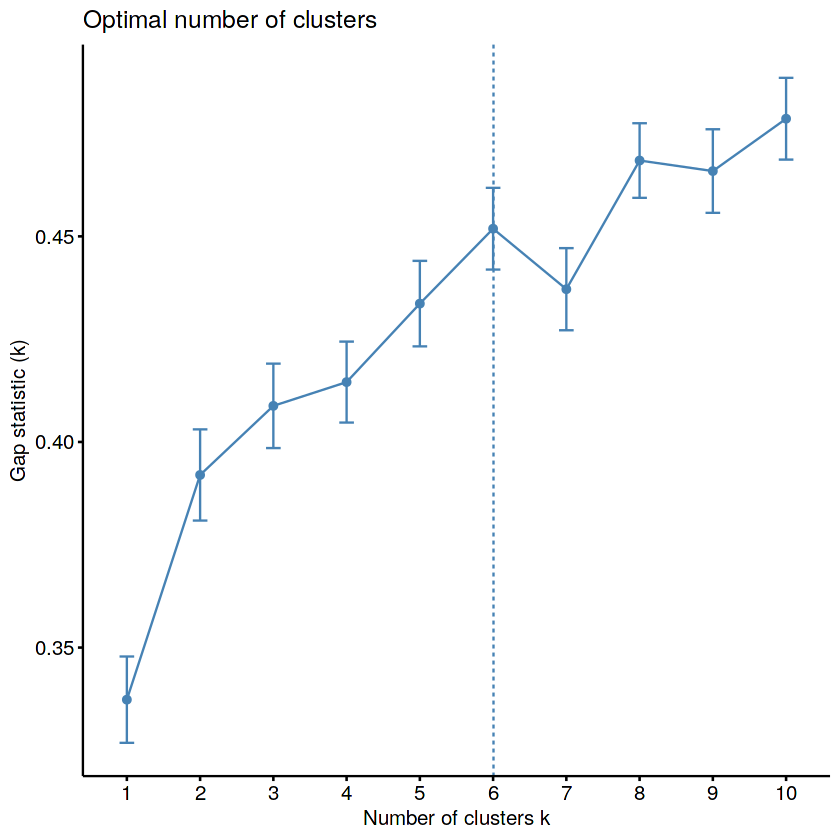

In [38]:
fviz_nbclust(datos.scaled, kmeans, method = "gap_stat")

In [39]:
library('NbClust')

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


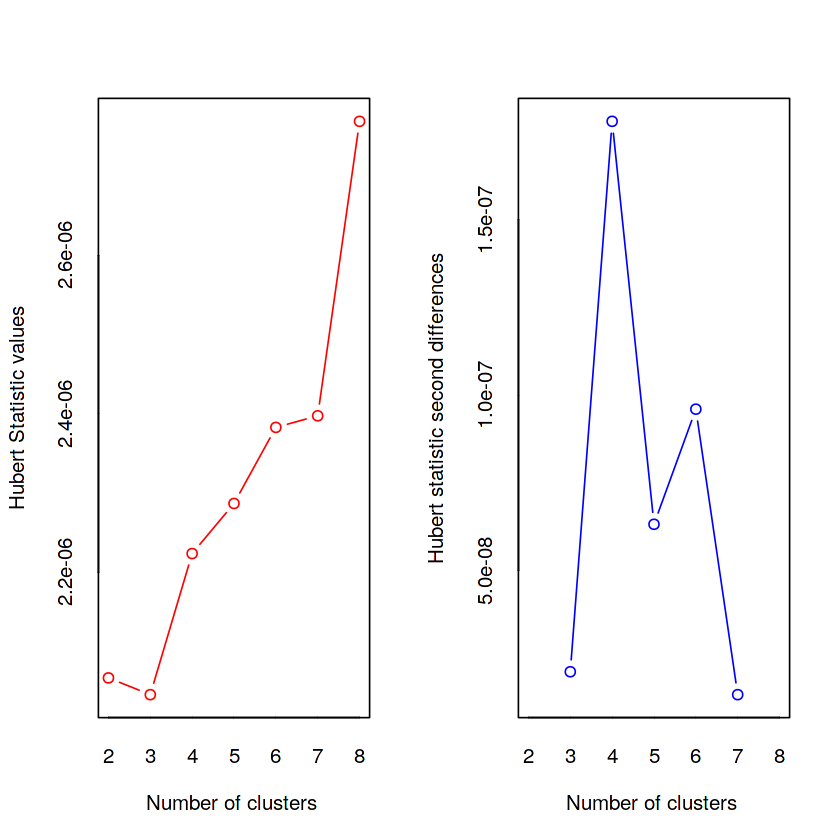

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 2 as the best number of clusters 
* 15 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


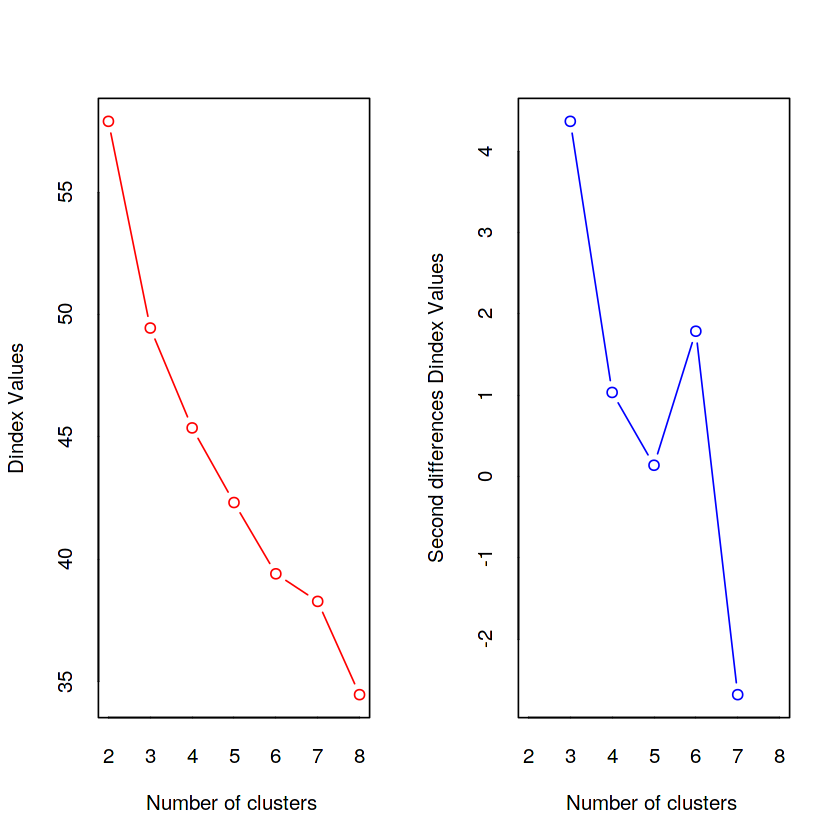

In [40]:
nbclust_out <- NbClust(
  data = datos,
  distance = "euclidean", #manhattan #canberra #minkowski
  min.nc = 2, # minimum number of clusters
  max.nc = 8, # maximum number of clusters
  method = "kmeans" # one of: "ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median", "centroid", "kmeans"
)

In [41]:
datos.2k <- kmeans(datos.scaled, 2, nstart = 25)
datos.3k <- kmeans(datos.scaled, 3, nstart = 25)
datos.9k <- kmeans(datos.scaled, 9, nstart = 25)
datos.8k <- kmeans(datos.scaled, 8, nstart = 25)
datos.4k <- kmeans(datos.scaled, 4, nstart = 25)
datos.5k <- kmeans(datos.scaled, 5, nstart = 25)
datos.6k <- kmeans(datos.scaled, 6, nstart = 25)

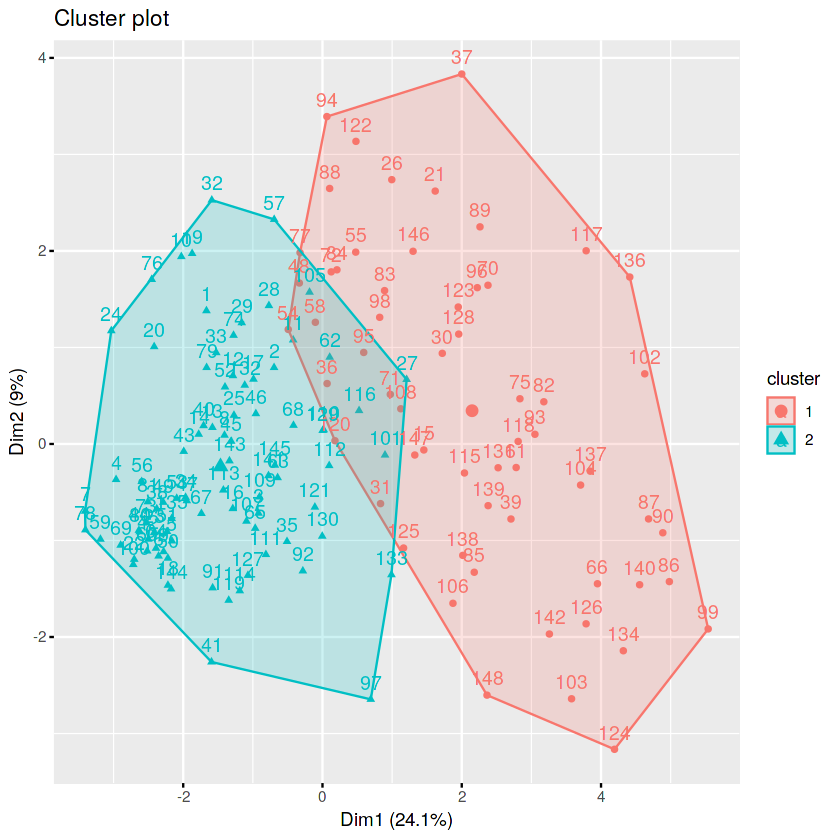

In [109]:
fviz_cluster(datos.2k, data = datos.scaled)

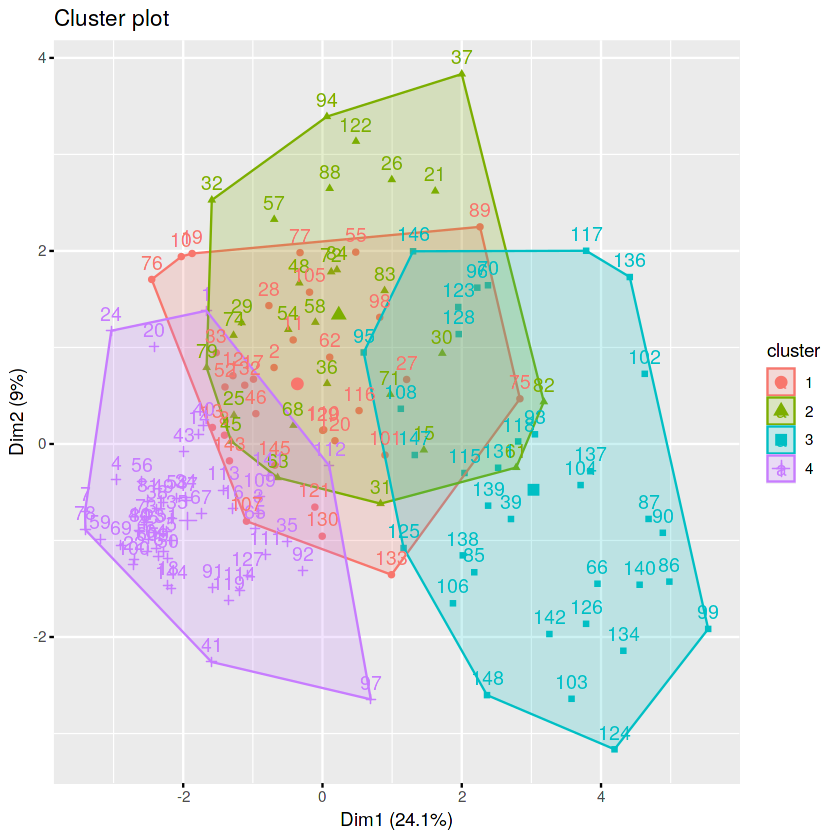

In [42]:
fviz_cluster(datos.4k, data = datos.scaled)

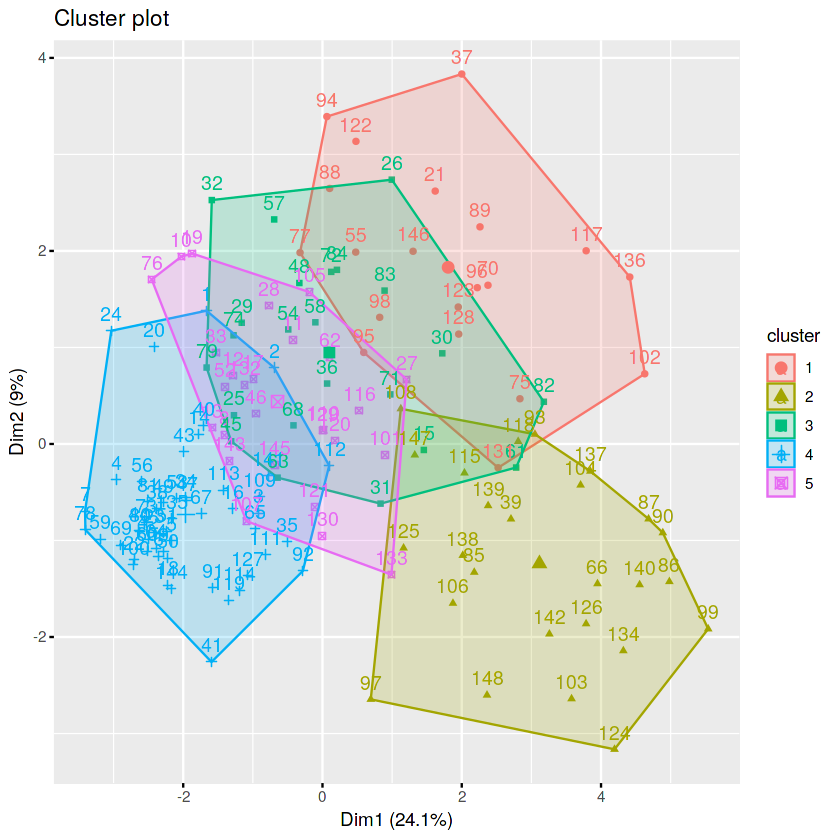

In [177]:
fviz_cluster(datos.5k, data = datos.scaled)

In [110]:
sil_coef2 <-silhouette(datos.2k$cluster, dist(datos.scaled))
sil_coef3 <-silhouette(datos.3k$cluster, dist(datos.scaled))
sil_coef4 <-silhouette(datos.4k$cluster, dist(datos.scaled))
sil_coef5 <-silhouette(datos.5k$cluster, dist(datos.scaled))
sil_coef6 <-silhouette(datos.6k$cluster, dist(datos.scaled))
sil_coef8 <-silhouette(datos.8k$cluster, dist(datos.scaled))
sil_coef9 <-silhouette(datos.9k$cluster, dist(datos.scaled))

  cluster size ave.sil.width
1       1   60          0.08
2       2   88          0.30


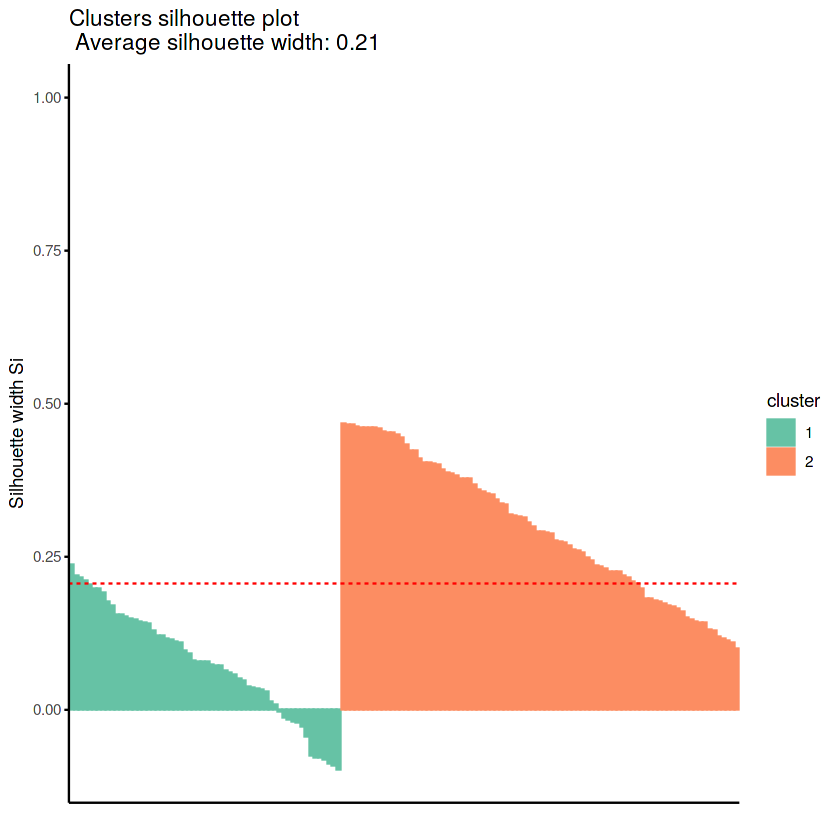

In [111]:
fviz_silhouette(sil.obj = sil_coef2, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [112]:
datos.2k$centers

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.5833333,0.5157277,0.11666667,0.350,0.9166667,0.01666667,0.2166667,0.5666667,0.6833333,0.3833333,0.6333333,0.2666667,0.6833333,0.7166667,0.3395579,0.3783281,0.2930362,0.4465322,0.4311803,0.6500000
2,0.9659091,0.4572663,0.09090909,0.625,0.7840909,0.60227273,0.8977273,0.9772727,0.8863636,0.6931818,0.9204545,0.9090909,0.9886364,0.9772727,0.1906733,0.2446457,0.2021894,0.6155814,0.6533771,0.2954545


  cluster size ave.sil.width
1       1   54          0.25
2       2   42          0.09
3       3   52          0.07


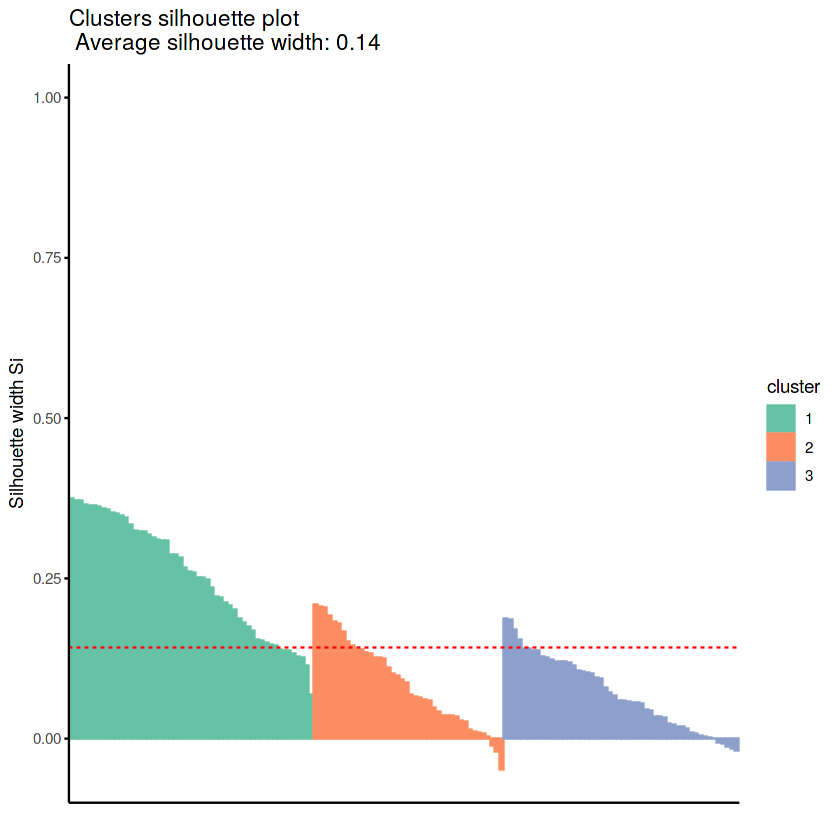

In [44]:
fviz_silhouette(sil.obj = sil_coef3, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   33          0.03
2       2   28          0.08
3       3   35          0.09
4       4   52          0.33


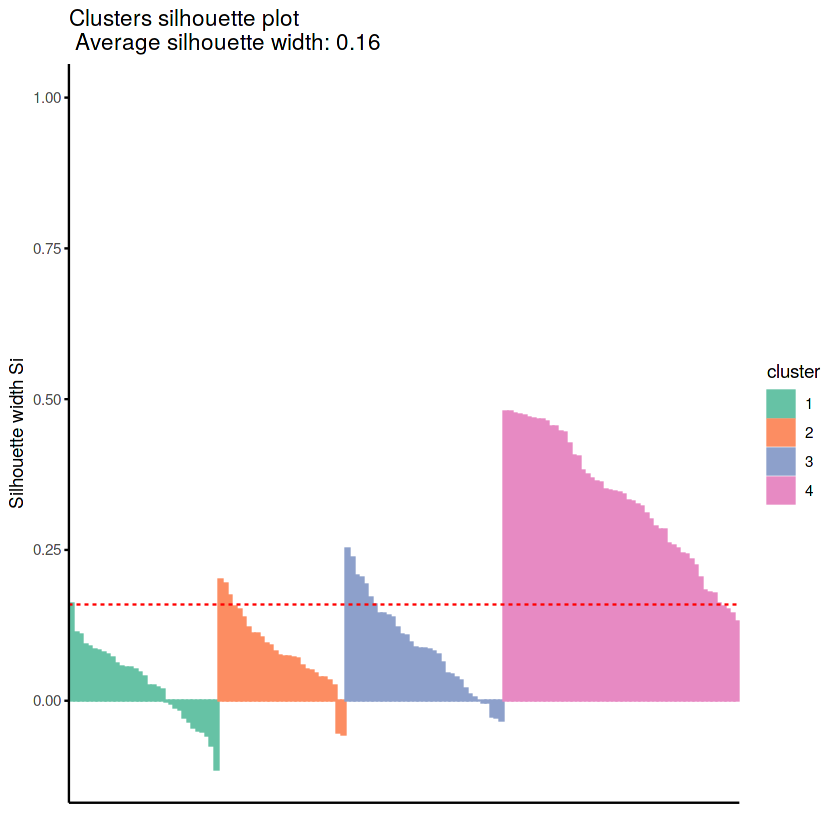

In [45]:
fviz_silhouette(sil.obj = sil_coef4, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [46]:
datos.4k$centers

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.9393939,0.4878361,0.12121212,0.4242424,0.7575758,0.4242424,1.0,0.9696970,0.6060606,0.06060606,0.7575758,0.6363636,1.0000000,0.9696970,0.2114365,0.3407909,0.2915121,0.5379670,0.6230866,0.4242424
2,0.9285714,0.4673038,0.21428571,0.4285714,0.7142857,0.0000000,0.0,0.4285714,0.7857143,0.60714286,0.8214286,0.6785714,0.9642857,0.8928571,0.2233249,0.3048833,0.2329545,0.5882973,0.5551085,0.1071429
3,0.3714286,0.5364185,0.02857143,0.3714286,0.9714286,0.0000000,0.2,0.6857143,0.7428571,0.37142857,0.6000000,0.1714286,0.4857143,0.6000000,0.4048176,0.3886226,0.2834459,0.3760128,0.3746347,0.9428571
4,0.9615385,0.4466414,0.07692308,0.7115385,0.8653846,0.7692308,1.0,1.0000000,0.9807692,1.00000000,0.9615385,0.9615385,0.9807692,0.9807692,0.1875694,0.2085362,0.1790694,0.6457194,0.6567479,0.2884615


  cluster size ave.sil.width
1       1   20          0.09
2       2   26          0.09
3       3   23          0.12
4       4   52          0.31
5       5   27          0.04


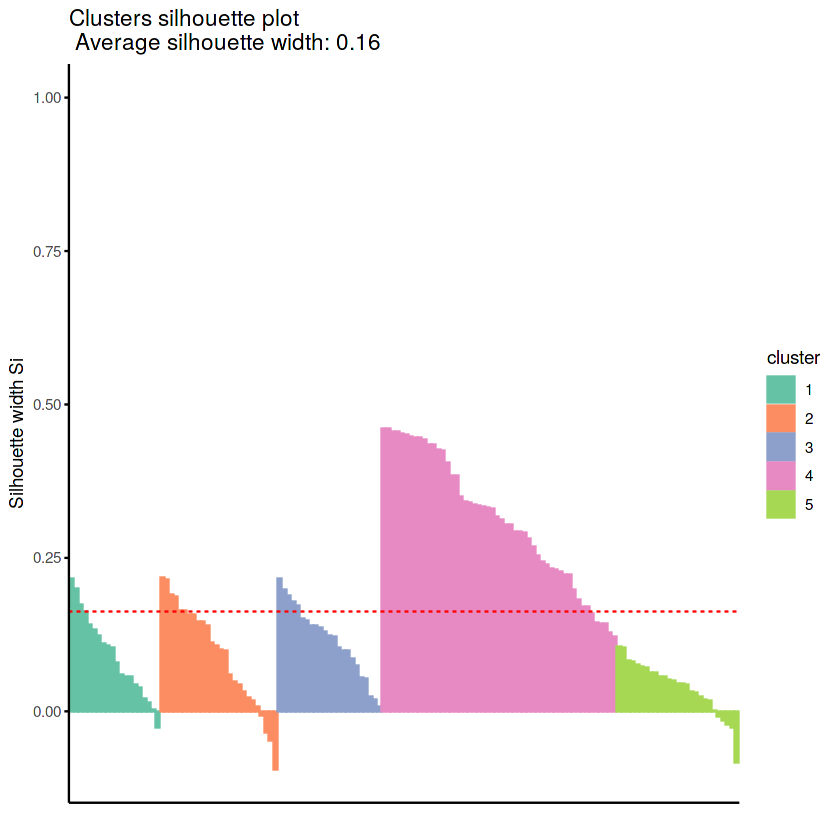

In [47]:
fviz_silhouette(sil.obj = sil_coef5, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   16          0.06
2       2   12          0.09
3       3   18          0.13
4       4   18          0.08
5       5   16          0.11
6       6   21          0.06
7       7   20          0.10
8       8   27          0.43


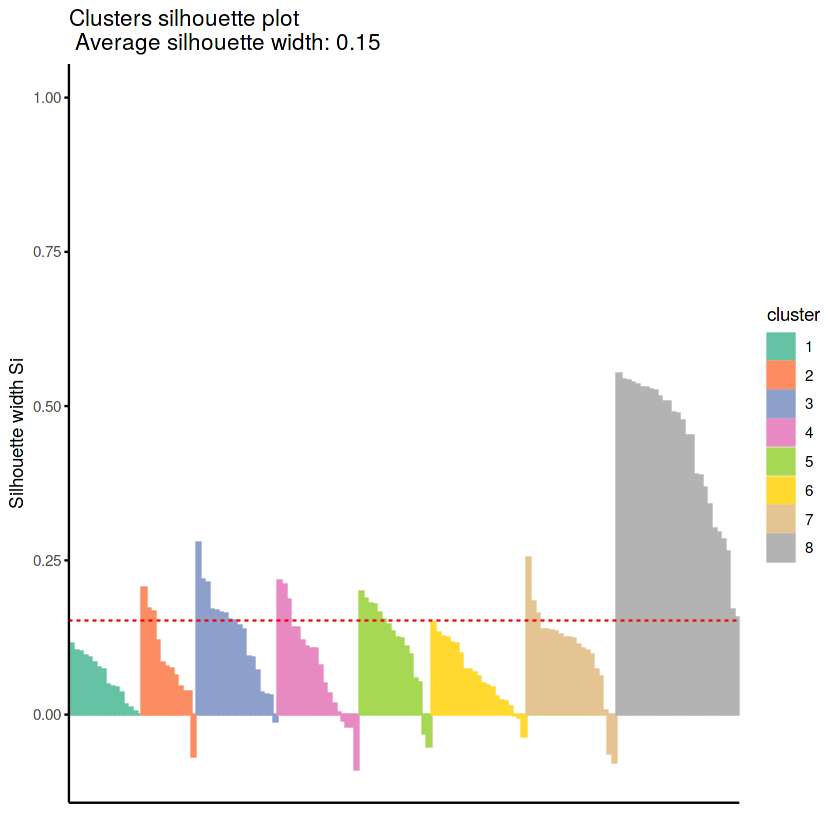

In [48]:
fviz_silhouette(sil.obj = sil_coef8, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   16          0.11
2       2   20          0.10
3       3   12          0.14
4       4   17          0.09
5       5   27          0.41
6       6   13          0.07
7       7   15          0.13
8       8   15          0.07
9       9   13          0.14


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


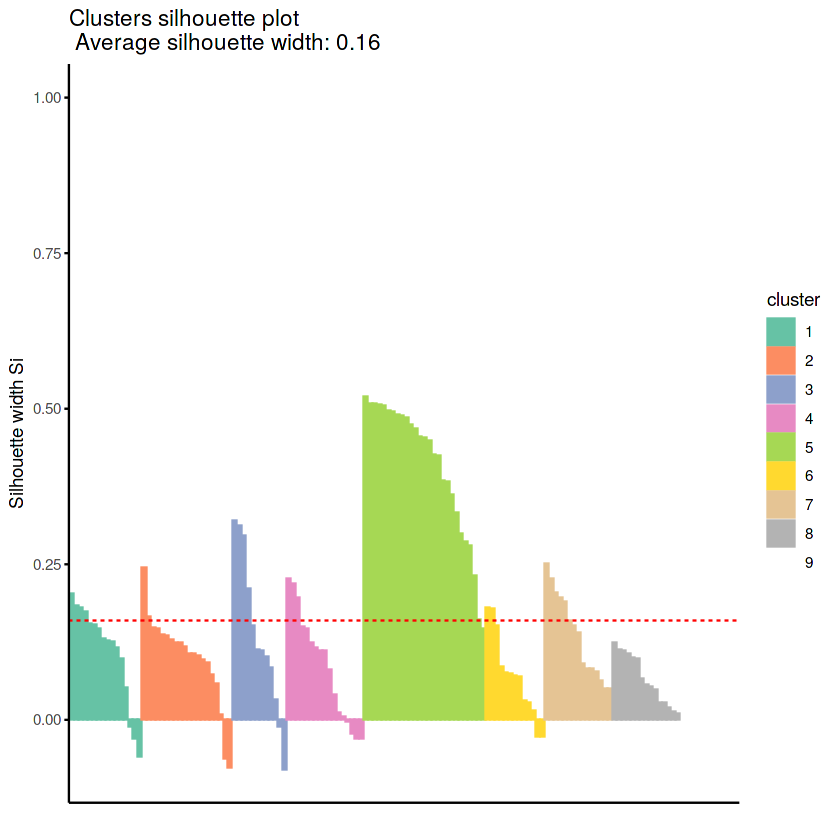

In [49]:
fviz_silhouette(sil.obj = sil_coef9, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   21          0.08
2       2   19          0.09
3       3   32          0.37
4       4   25          0.10
5       5   21          0.13
6       6   30          0.07


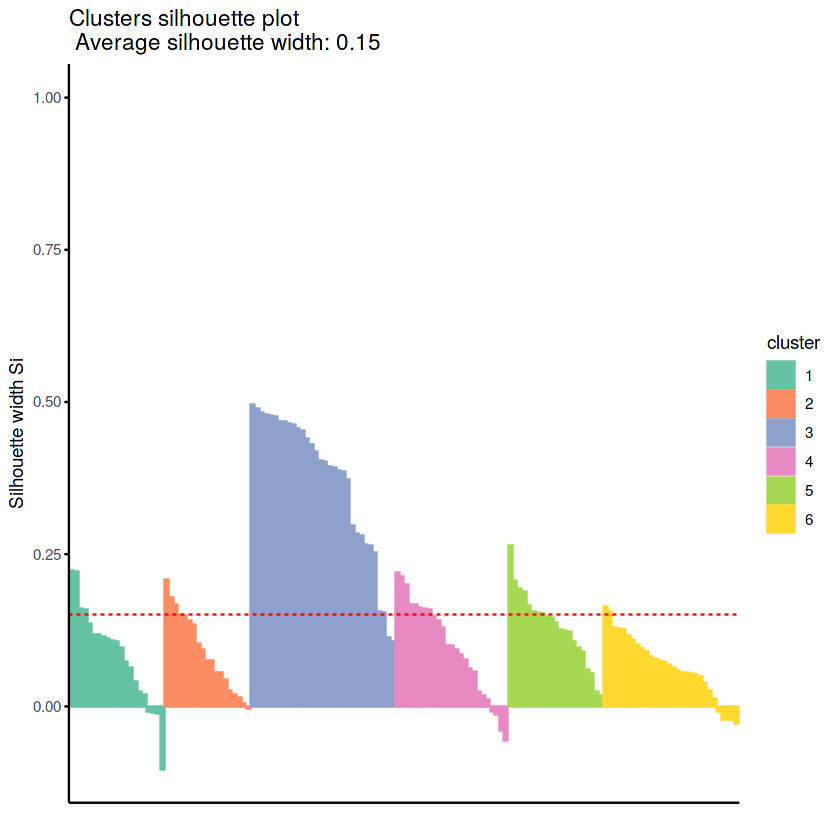

In [50]:
fviz_silhouette(sil.obj = sil_coef6, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

### Combinando kmeans con PCA

In [145]:
pca = datos.scaled[,c("class", "fatigue", "malaise", "liver_big", "liver_firm", "spiders", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology")]
#pca = datos.scaled[,c("class", "age", "antivirals", "fatigue", "malaise", "liver_big", "spiders", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime")]

In [146]:
summary(pca)

     class           fatigue          malaise         liver_big     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :1.0000   Median :0.0000   Median :1.0000   Median :1.0000  
 Mean   :0.8108   Mean   :0.3649   Mean   :0.6216   Mean   :0.8041  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   liver_firm        spiders         bilirubin      alk_phosphate   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.1181   1st Qu.:0.1803  
 Median :1.0000   Median :1.0000   Median :0.1826   Median :0.2238  
 Mean   :0.5676   Mean   :0.6486   Mean   :0.2510   Mean   :0.2988  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.2902   3rd Qu.:0.3966  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      sgot            albumin     

In [147]:
str(pca)

'data.frame':	148 obs. of  12 variables:
 $ class        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ fatigue      : num  1 0 0 1 1 1 1 0 1 1 ...
 $ malaise      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ liver_big    : num  0 0 1 1 1 1 1 1 1 0 ...
 $ liver_firm   : num  1 1 1 1 1 1 1 0 1 0 ...
 $ spiders      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ bilirubin    : num  0.183 0.161 0.118 0.118 0.183 ...
 $ alk_phosphate: num  0.2201 0.4058 0.261 0.0753 0.1334 ...
 $ sgot         : num  0.0152 0.1061 0.0682 0.1439 0.7045 ...
 $ albumin      : num  0.594 0.438 0.594 0.594 0.594 ...
 $ protime      : num  0.419 0.702 0.367 0.725 0.642 ...
 $ histology    : num  0 0 0 0 0 0 0 0 0 0 ...


### PCA relevantes
Se utilizarán los atributos relevantes según lab1

In [148]:
head(pca)

,class,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,1,1,0.1826090,0.22014802,0.01515152,0.59375,0.4189585,0
2,1,0,1,0,1,1,0.1610988,0.40582706,0.10606061,0.43750,0.7019791,0
3,1,0,1,1,1,1,0.1180782,0.26099740,0.06818182,0.59375,0.3671492,0
4,1,1,1,1,1,1,0.1180782,0.07531836,0.14393939,0.59375,0.7251269,0
5,1,1,1,1,1,1,0.1826090,0.13341140,0.70454545,0.59375,0.6424375,0
6,1,1,1,1,1,1,0.1610988,0.25728382,0.05303030,0.59375,0.6798064,0


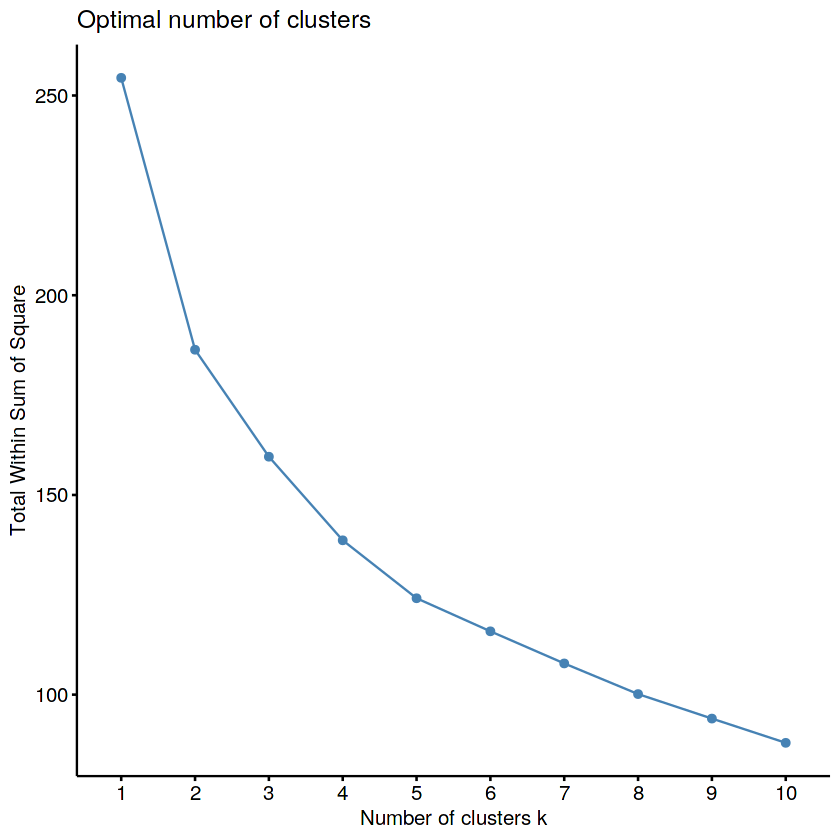

In [149]:
fviz_nbclust(pca, kmeans, method = "wss")

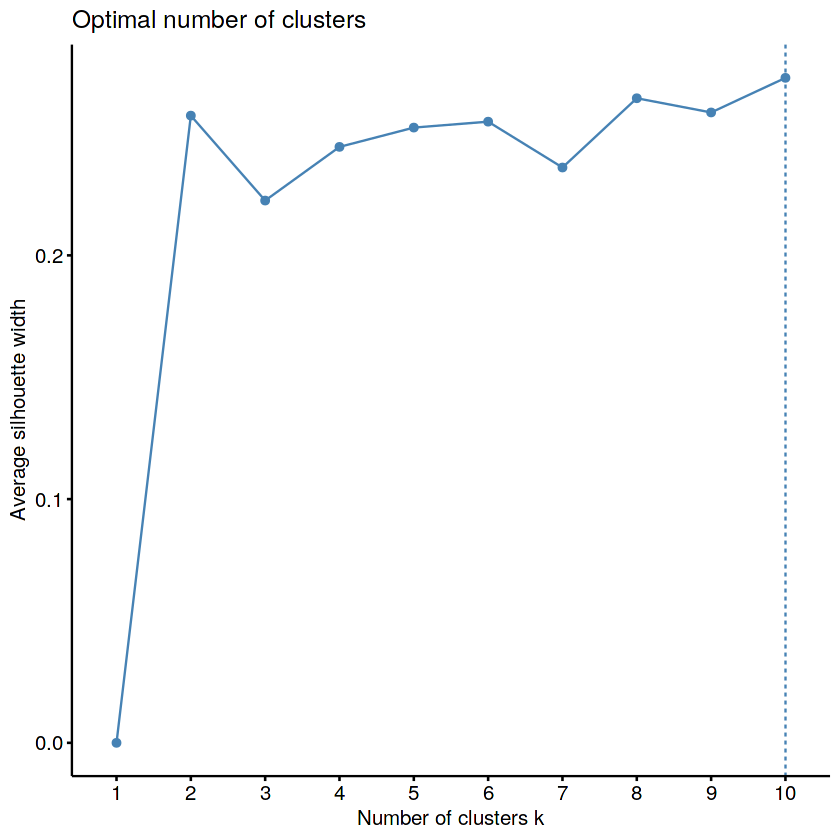

In [150]:
fviz_nbclust(pca, kmeans, method = "silhouette")

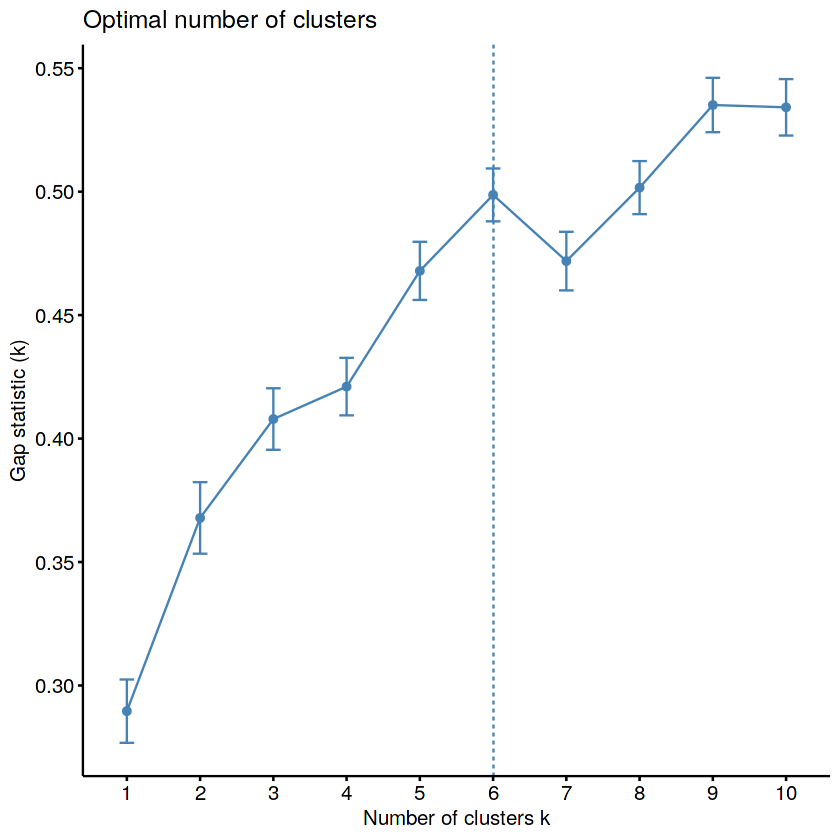

In [151]:
fviz_nbclust(pca, kmeans, method = "gap_stat")

[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


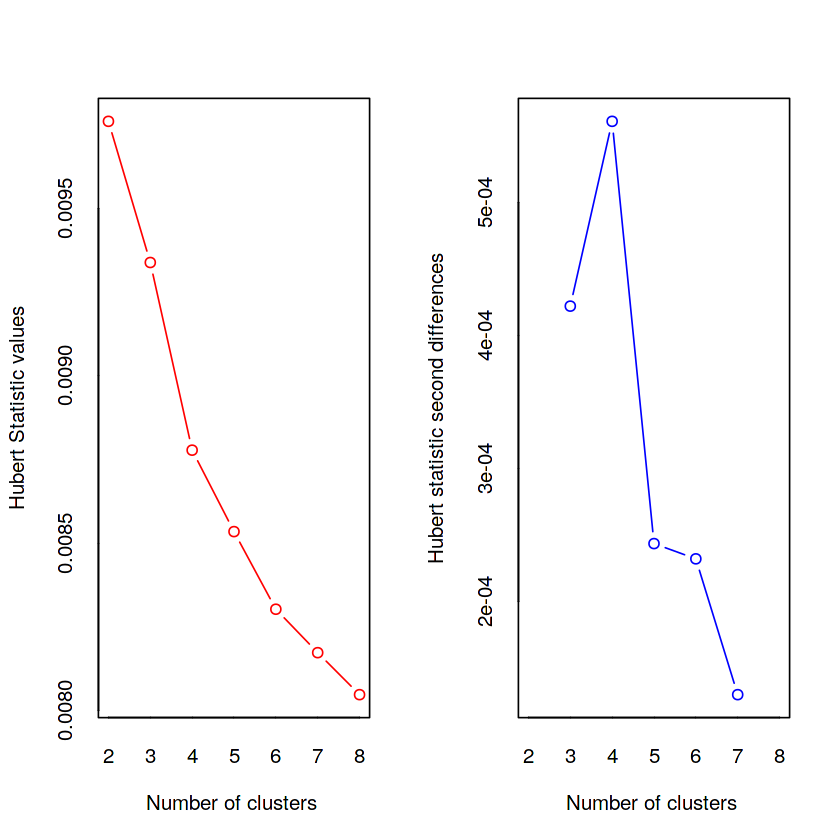

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 
* 4 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


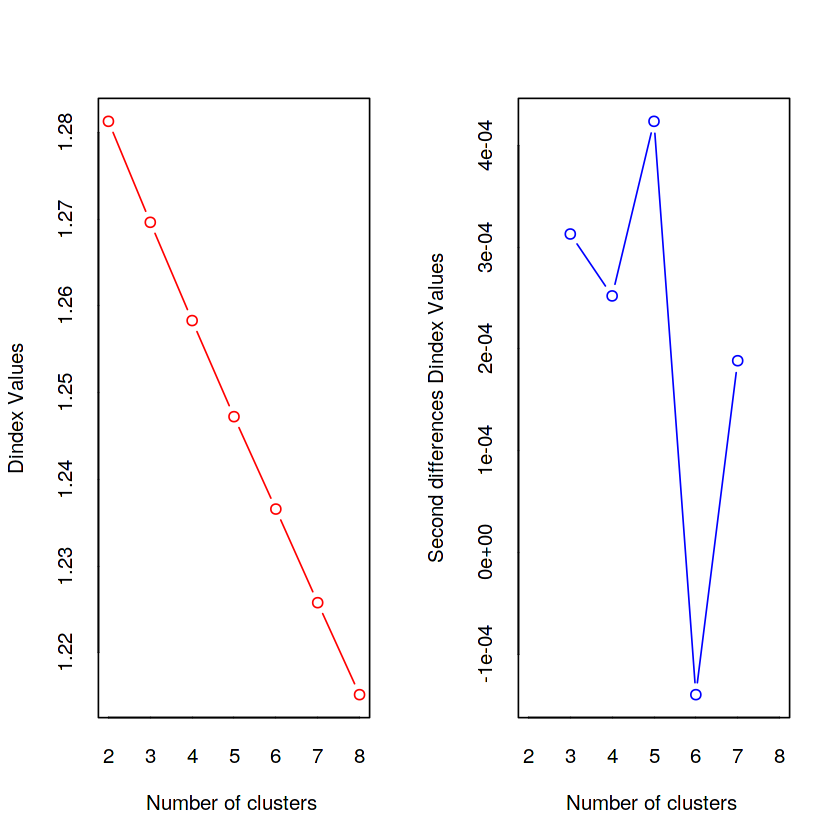

In [152]:
nbclust_out <- NbClust(
  data = pca,
  distance = "euclidean",
  min.nc = 2, # minimum number of clusters
  max.nc = 8, # maximum number of clusters
  method = "centroid" # one of: "ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median", "centroid", "kmeans"
)

In [165]:
pca.cluster.2k = kmeans(pca, 2, nstart = 25)
pca.cluster.3k = kmeans(pca, 3, nstart = 25)
pca.cluster.4k = kmeans(pca, 4, nstart = 25)
pca.cluster.5k = kmeans(pca, 5, nstart = 25)
pca.cluster.6k = kmeans(pca, 6, nstart = 25)
pca.cluster.7k = kmeans(pca, 7, nstart = 25)
pca.cluster.8k = kmeans(pca, 8, nstart = 25)
pca.cluster.9k = kmeans(pca, 9, nstart = 25)
pca.cluster.10k = kmeans(pca, 10, nstart = 25)

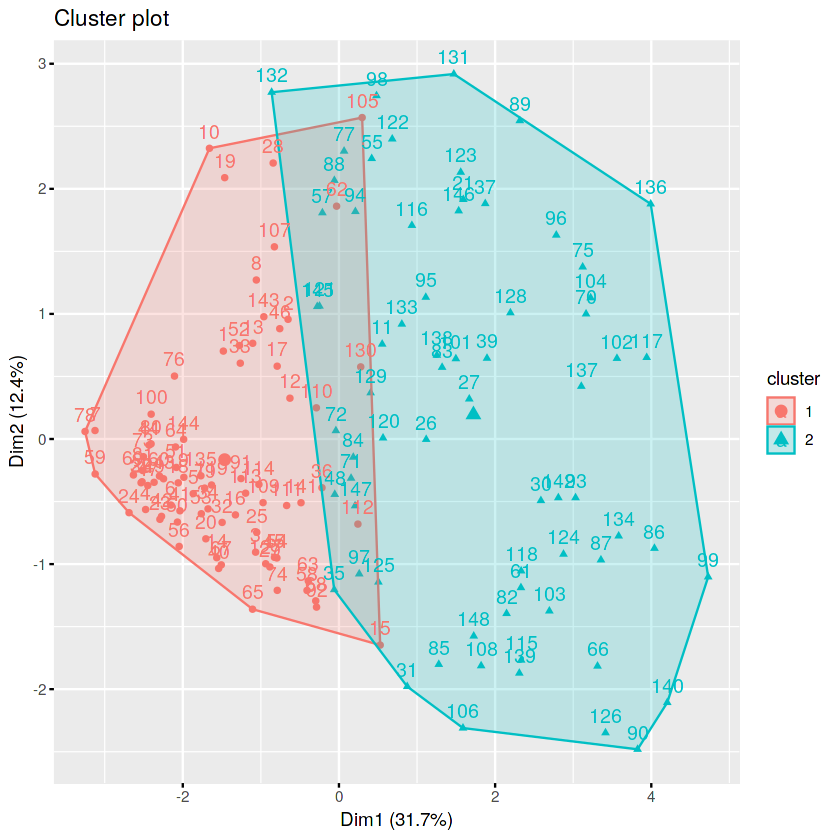

In [166]:
fviz_cluster(pca.cluster.2k, data = pca)

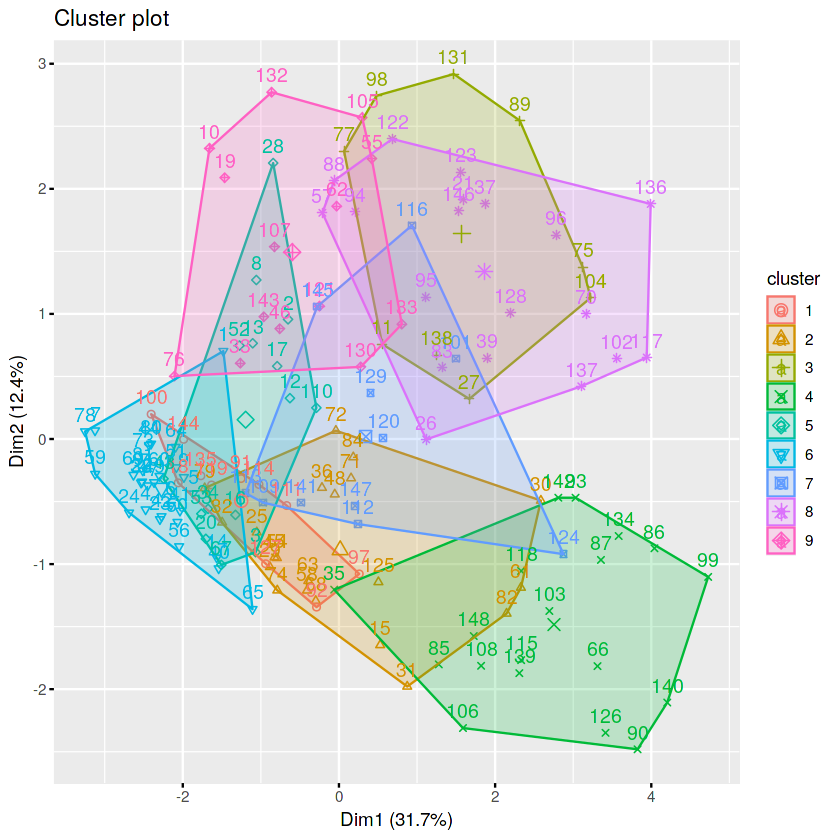

In [167]:
fviz_cluster(pca.cluster.9k, data = pca)

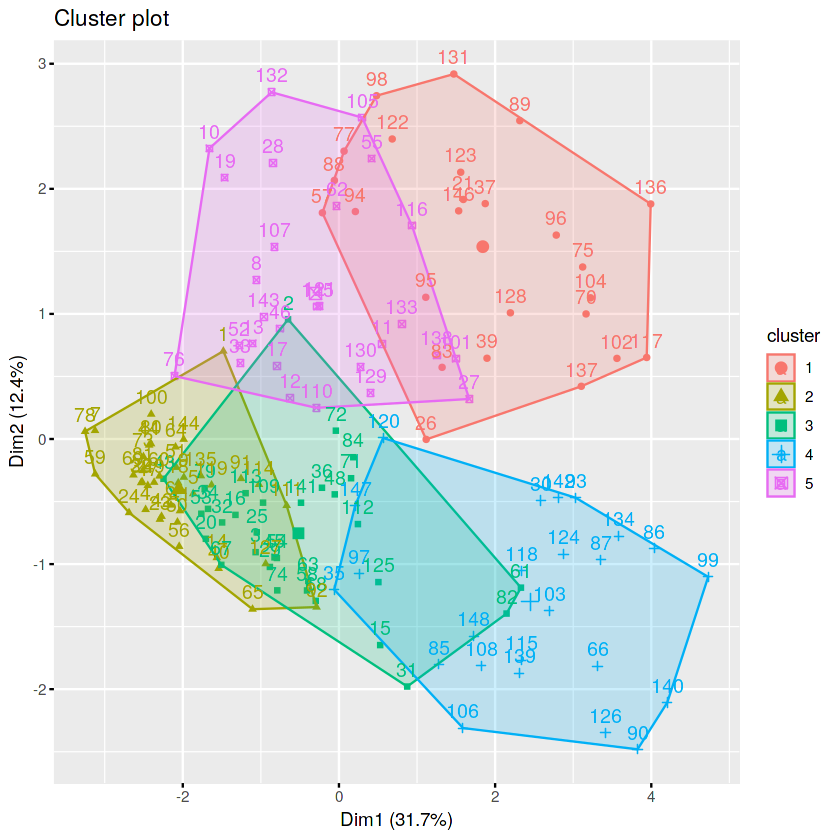

In [168]:
fviz_cluster(pca.cluster.5k, data = pca)

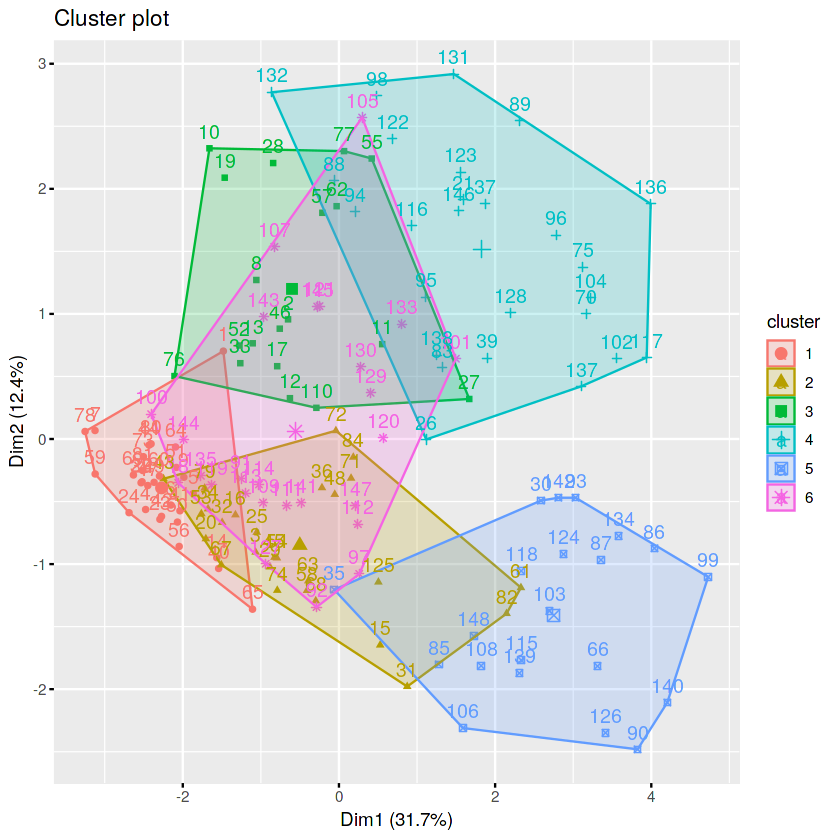

In [157]:
fviz_cluster(pca.cluster.6k, data = pca)

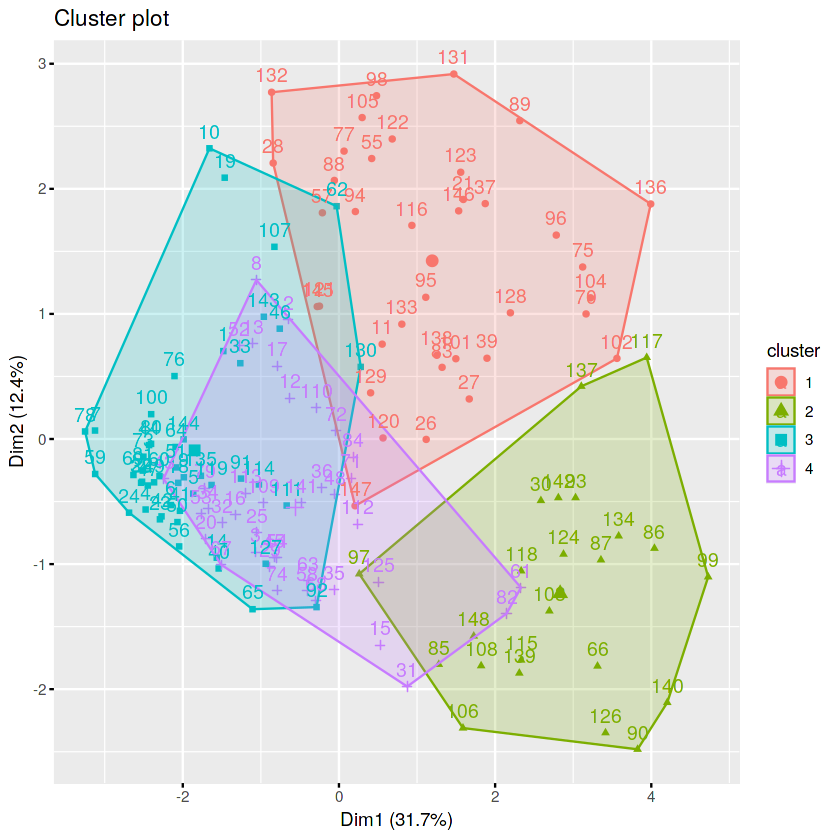

In [158]:
fviz_cluster(pca.cluster.4k, data = pca)

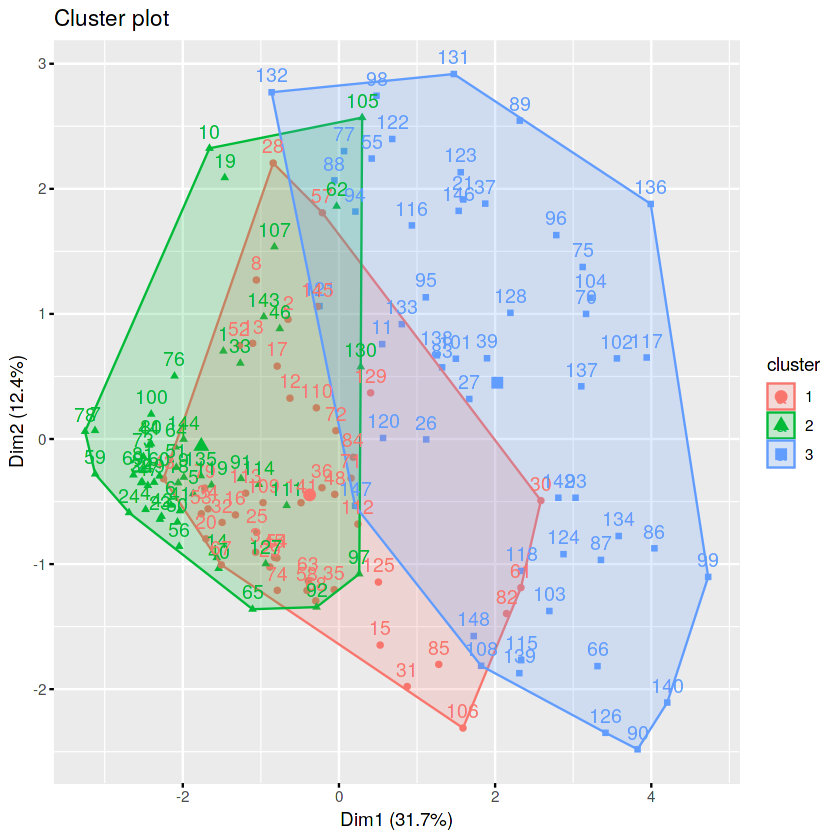

In [159]:
fviz_cluster(pca.cluster.3k, data = pca)

In [172]:
sil2k <-silhouette(pca.cluster.2k$cluster, dist(pca))
sil3k <-silhouette(pca.cluster.3k$cluster, dist(pca))
sil4k <-silhouette(pca.cluster.4k$cluster, dist(pca))
sil5k <-silhouette(pca.cluster.5k$cluster, dist(pca))
sil6k <-silhouette(pca.cluster.6k$cluster, dist(pca))
sil7k <-silhouette(pca.cluster.7k$cluster, dist(pca))
sil8k <-silhouette(pca.cluster.8k$cluster, dist(pca))
sil9k <-silhouette(pca.cluster.9k$cluster, dist(pca))
sil10k <-silhouette(pca.cluster.10k$cluster, dist(pca))

  cluster size ave.sil.width
1       1   80          0.36
2       2   68          0.13


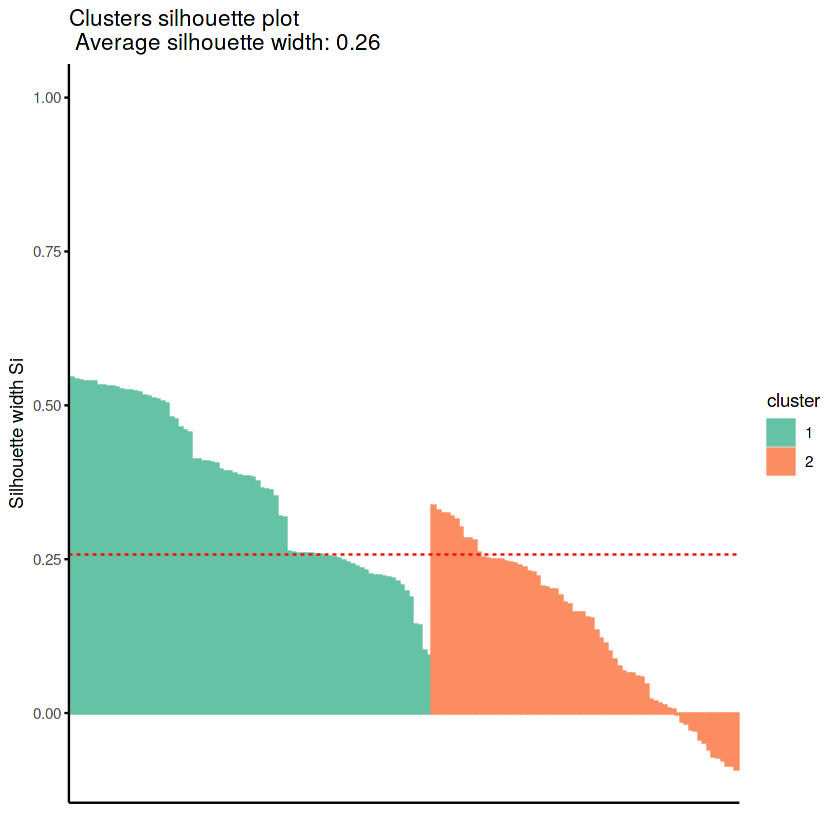

In [170]:
fviz_silhouette(sil.obj = sil2k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [162]:
pca.cluster.2k$centers

,class,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.6029412,0.07352941,0.3529412,0.6764706,0.3088235,0.2500,0.3331138,0.3645112,0.2922623,0.4561637,0.4491125,0.6911765
2,0.9875000,0.61250000,0.8500000,0.9125000,0.7875000,0.9875,0.1812623,0.2430219,0.1937625,0.6242995,0.6603544,0.2250000


  cluster size ave.sil.width
1       1   38          0.08
2       2   23          0.23
3       3   48          0.38
4       4   39          0.22


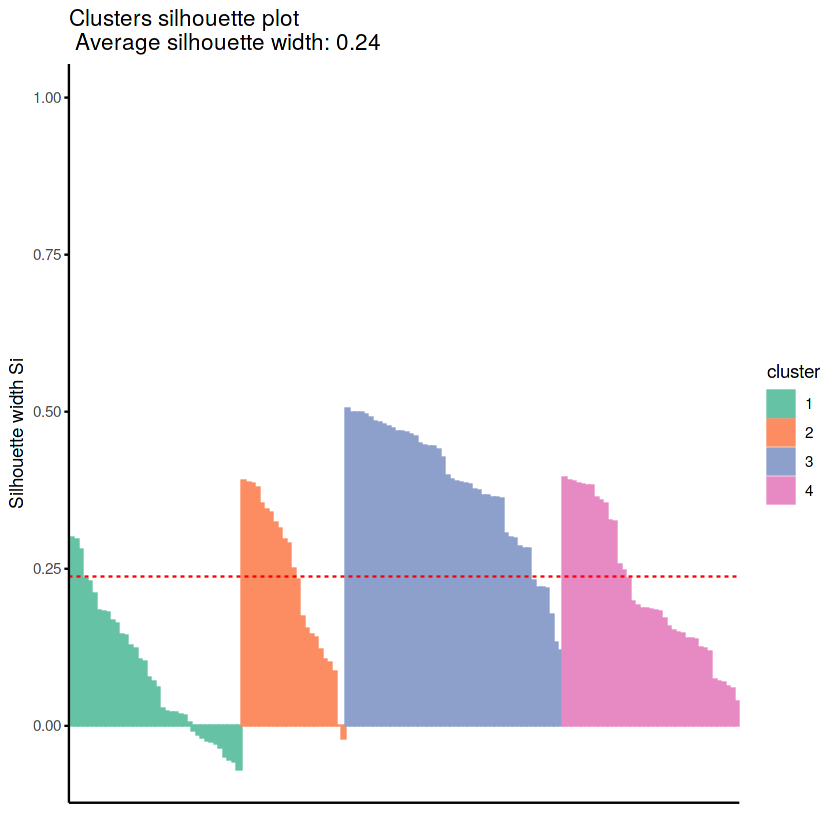

In [163]:
fviz_silhouette(sil.obj = sil4k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [164]:
pca.cluster.4k$centers

,class,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.92105263,0.13157895,0.5526316,0.4210526,0.05263158,0.2368421,0.2727403,0.3707524,0.3314048,0.5178041,0.5447563,0.6842105
2,0.04347826,0.04347826,0.1739130,0.9130435,0.52173913,0.2608696,0.4534159,0.3690653,0.2409486,0.3418175,0.3017944,0.9130435
3,0.97916667,1.00000000,1.0000000,0.9166667,0.81250000,0.9791667,0.1669206,0.2480930,0.1770253,0.6283663,0.6754830,0.2708333
4,0.94871795,0.00000000,0.4871795,0.9743590,0.79487179,0.8717949,0.2140472,0.2498193,0.2241647,0.5964911,0.5975079,0.1282051


  cluster size ave.sil.width
1       1   25          0.08
2       2   51          0.35
3       3   25          0.15
4       4   23          0.19
5       5   24          0.24


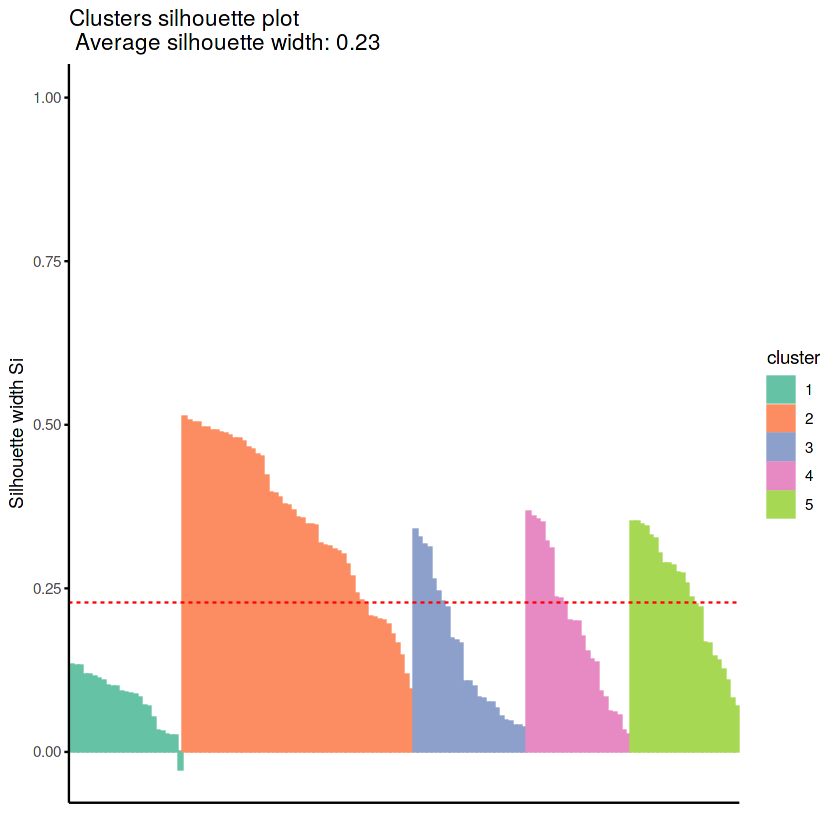

In [130]:
fviz_silhouette(sil.obj = sil5k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [131]:
pca.cluster.5k$centers

,class,age,antivirals,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.9600000,0.4535211,0.6800000,0.52000000,1.0000000,0.7600000,0.0000000,0.760000,0.1993286,0.3394591,0.2837353,0.5344386,0.6405938,0.36000000
2,1.0000000,0.4479426,0.8627451,0.76470588,1.0000000,0.9607843,1.0000000,1.000000,0.1847142,0.2133328,0.1829519,0.6412237,0.6603661,0.27450980
3,0.8000000,0.5121127,0.9600000,0.04000000,0.3600000,0.2000000,0.0000000,0.160000,0.3261201,0.3876485,0.2951515,0.5213736,0.5204737,0.80000000
4,0.1304348,0.5303123,0.9565217,0.04347826,0.3043478,1.0000000,0.6521739,0.173913,0.3963669,0.3338305,0.2407839,0.3594805,0.3319003,0.91304348
5,0.9166667,0.5000000,0.7083333,0.00000000,0.0000000,0.9583333,0.7500000,0.750000,0.2283184,0.3121976,0.2514205,0.5665552,0.5428725,0.04166667


  cluster size ave.sil.width
1       1   24          0.15
2       2   19          0.07
3       3   23          0.23
4       4   25          0.14
5       5   37          0.40
6       6   20          0.23


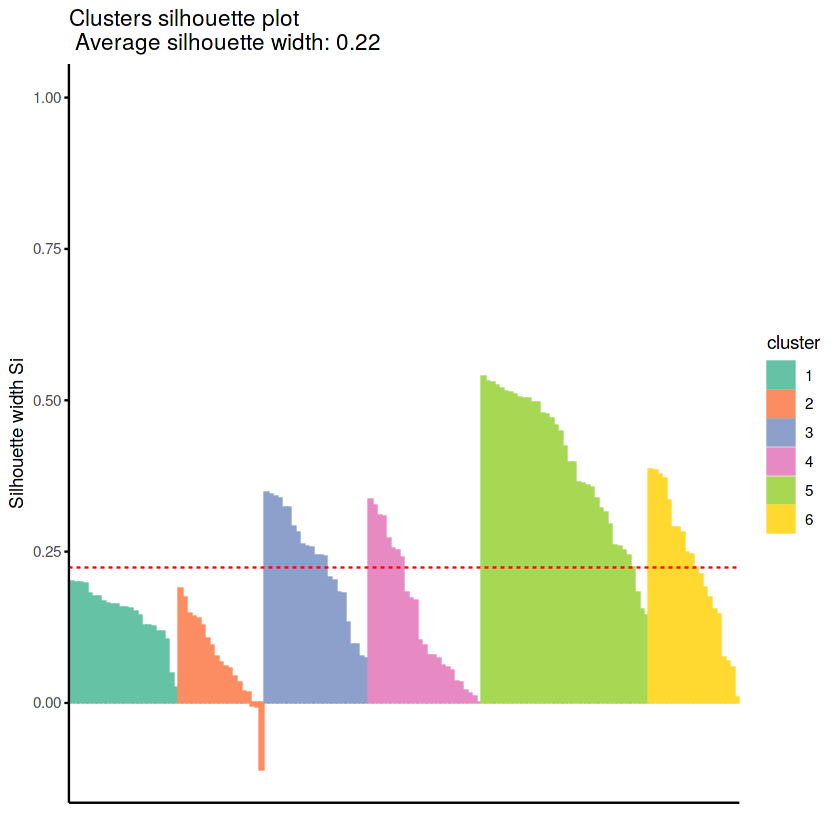

In [132]:
fviz_silhouette(sil.obj = sil6k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   46          0.14
2       2   52          0.13
3       3   50          0.33


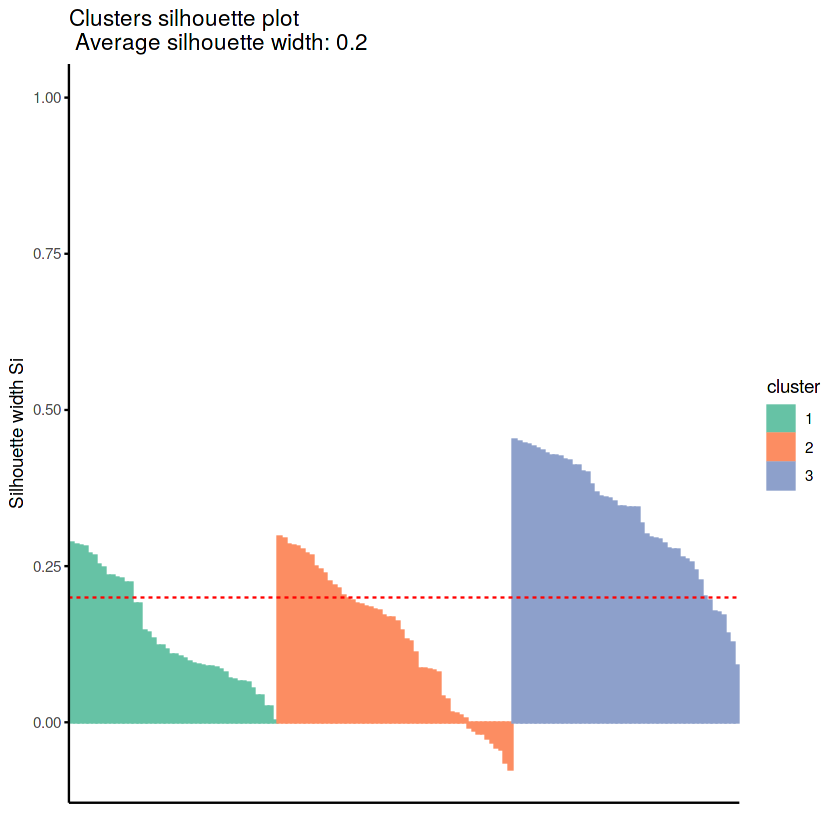

In [133]:
fviz_silhouette(sil.obj = sil3k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

In [134]:
pca.cluster.3k$centers

,class,age,antivirals,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.9347826,0.5110227,0.7391304,0.00000000,0.5000000,0.9347826,0.6739130,0.8478261,0.2144069,0.2637106,0.2356719,0.5892805,0.5900575,0.1521739
2,0.5384615,0.5268147,0.9615385,0.07692308,0.3653846,0.6153846,0.2692308,0.1730769,0.3589749,0.3718129,0.2898485,0.4367046,0.4361545,0.8461538
3,0.9800000,0.4056338,0.8000000,1.00000000,1.0000000,0.8800000,0.7800000,0.9600000,0.1724662,0.2552710,0.1892362,0.6229510,0.6709065,0.2800000


  cluster size ave.sil.width
1       1   22          0.23
2       2   15          0.05
3       3   17          0.15
4       4   14          0.07
5       5   19          0.23
6       6   25          0.56
7       7   20          0.10
8       8   16          0.18


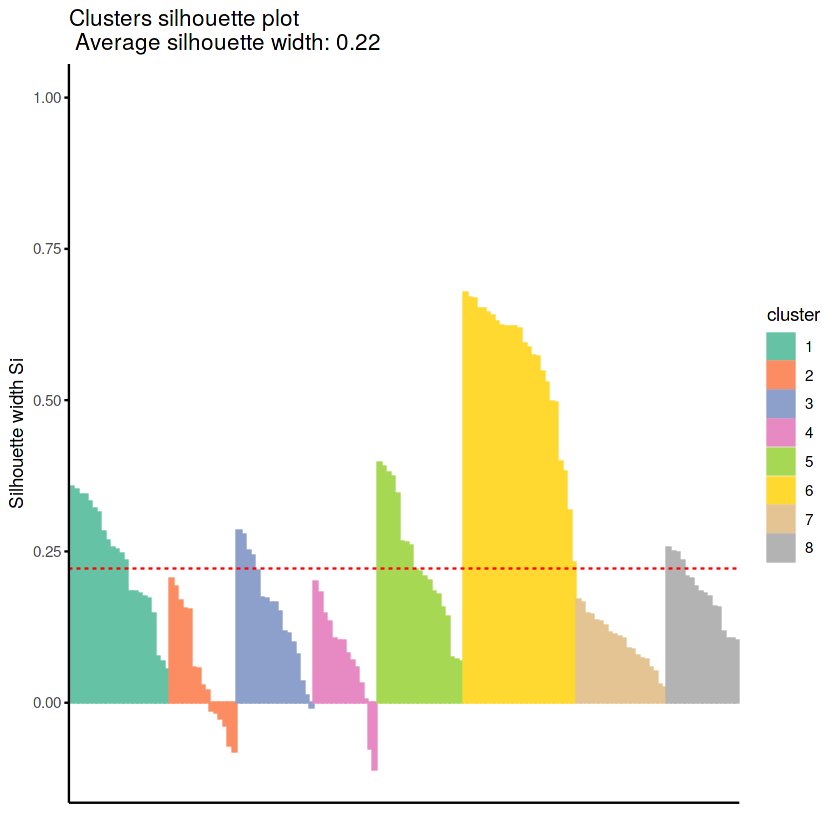

In [135]:
fviz_silhouette(sil.obj = sil8k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   24          0.15
2       2   19          0.07
3       3   23          0.23
4       4   25          0.14
5       5   37          0.40
6       6   20          0.23


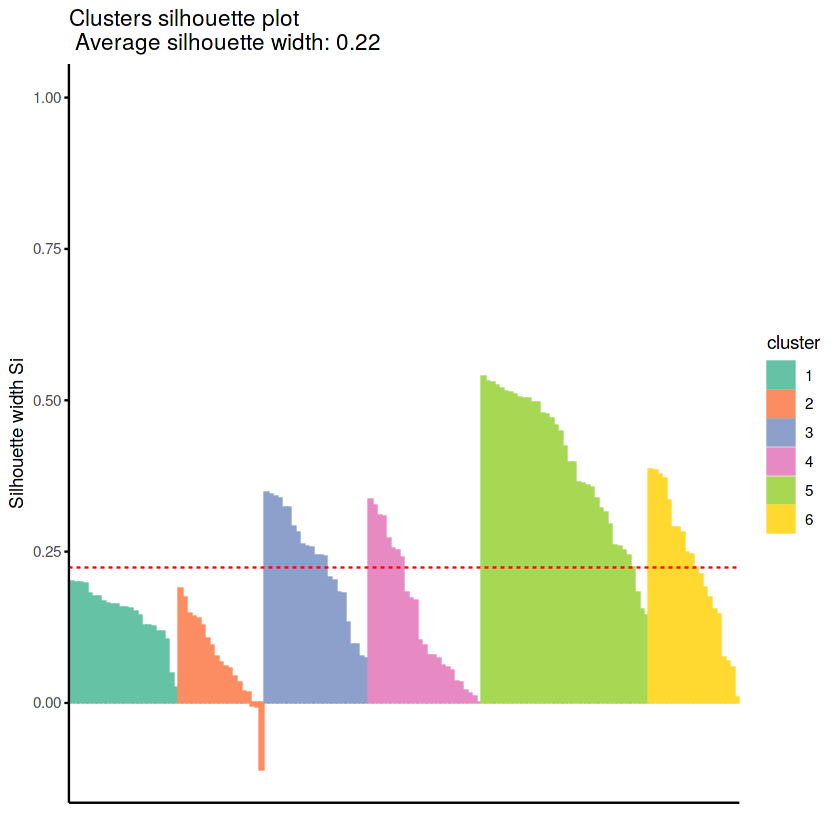

In [136]:
fviz_silhouette(sil.obj = sil6k, print.summary = TRUE, palette = "Set2",
                ggtheme = theme_classic())

  cluster size ave.sil.width
1       1   14          0.07
2       2   22          0.23
3       3   14          0.21
4       4   14          0.23
5       5   25          0.54
6       6   11          0.20
7       7   19          0.22
8       8    9          0.01
9       9   20          0.10


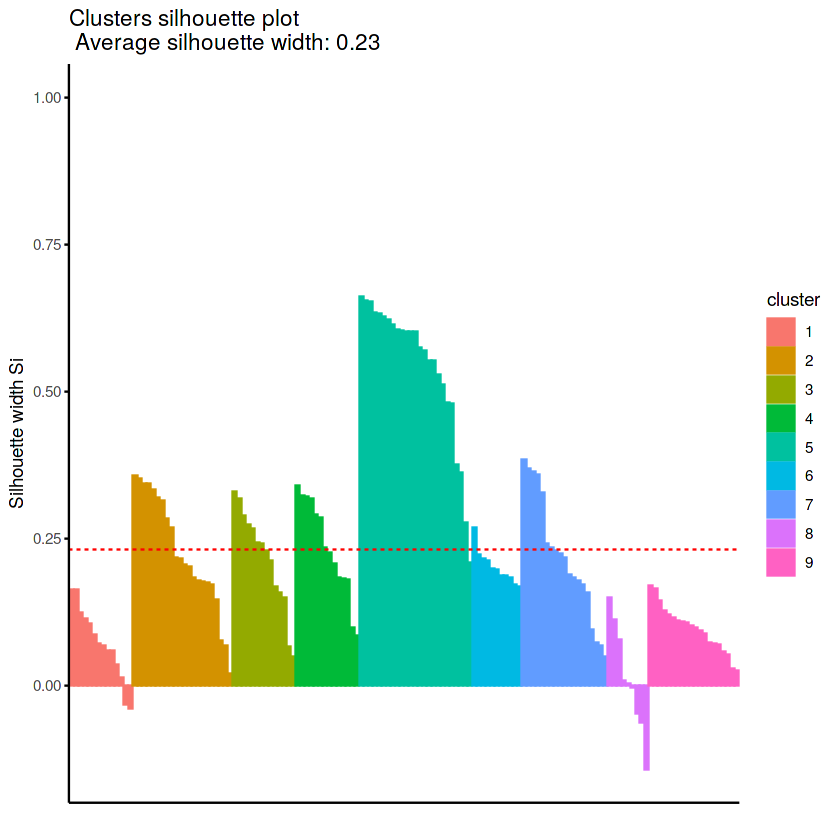

In [137]:
fviz_silhouette(sil.obj = sil9k, print.summary = TRUE,
                ggtheme = theme_classic())

In [138]:
pca.cluster.9k$centers

,class,age,antivirals,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.85714286,0.5181087,0.9285714,0.3571429,1.0000000,0.4285714,0.0000000,0.0000000,0.2290491,0.3587892,0.32404040,0.4778864,0.5355705,0.57142857
2,0.90909091,0.4737516,0.7272727,0.0000000,0.0000000,1.0000000,0.8181818,0.7727273,0.2295406,0.3119570,0.24569559,0.5612420,0.5378400,0.04545455
3,0.85714286,0.5010060,1.0000000,0.0000000,0.0000000,0.3571429,0.0000000,0.0000000,0.3577642,0.4391557,0.37283550,0.5235639,0.4945310,0.71428571
4,0.85714286,0.4245473,0.9285714,1.0000000,1.0000000,1.0000000,0.7857143,0.9285714,0.1887548,0.3502896,0.14826840,0.5947509,0.6570778,1.00000000
5,1.00000000,0.3859155,1.0000000,1.0000000,1.0000000,0.9600000,0.9600000,1.0000000,0.1796067,0.2209234,0.21443406,0.6679275,0.7373186,0.00000000
6,1.00000000,0.4122919,0.0000000,0.7272727,1.0000000,0.8181818,0.5454545,1.0000000,0.1463949,0.1355312,0.09022039,0.6147167,0.5772108,0.00000000
7,0.05263158,0.5337287,0.9473684,0.0000000,0.1578947,1.0000000,0.5789474,0.2105263,0.4300473,0.3546806,0.24263158,0.2970027,0.2935407,0.94736842
8,0.88888889,0.6416275,0.5555556,0.2222222,0.5555556,0.1111111,0.0000000,1.0000000,0.2853804,0.2812158,0.16877104,0.5277778,0.5824984,0.66666667
9,0.95000000,0.5225352,1.0000000,0.0000000,1.0000000,0.9500000,0.7000000,0.8500000,0.2202520,0.2503186,0.28276515,0.6207913,0.6156484,0.40000000


In [139]:
pca.cluster.9k$centers[,c("class", "bilirubin", "albumin", "protime", "histology")]

,class,bilirubin,albumin,protime,histology
1,0.85714286,0.2290491,0.4778864,0.5355705,0.57142857
2,0.90909091,0.2295406,0.5612420,0.5378400,0.04545455
3,0.85714286,0.3577642,0.5235639,0.4945310,0.71428571
4,0.85714286,0.1887548,0.5947509,0.6570778,1.00000000
5,1.00000000,0.1796067,0.6679275,0.7373186,0.00000000
6,1.00000000,0.1463949,0.6147167,0.5772108,0.00000000
7,0.05263158,0.4300473,0.2970027,0.2935407,0.94736842
8,0.88888889,0.2853804,0.5277778,0.5824984,0.66666667
9,0.95000000,0.2202520,0.6207913,0.6156484,0.40000000


In [75]:
pca.cluster.3k

K-means clustering with 3 clusters of sizes 43, 54, 51

Cluster means:
      class       age        sex antivirals fatigue   malaise liver_big
1 0.4651163 0.5257124 0.06976744  0.9534884       0 0.2325581 0.5813953
2 0.9629630 0.4167971 0.07407407  0.8148148       1 1.0000000 0.8703704
3 0.9411765 0.5111848 0.15686275  0.7647059       0 0.5490196 0.9215686
  liver_firm   spiders   ascites bilirubin alk_phosphate      sgot   albumin
1  0.2790698 0.2093023 0.5813953 0.3773798     0.3822658 0.2811875 0.4074684
2  0.7407407 0.8888889 0.9814815 0.1787943     0.2523775 0.1903001 0.6219454
3  0.6274510 0.7647059 0.9803922 0.2209901     0.2776999 0.2550505 0.5854294
    protime histology
1 0.4149345 0.8837209
2 0.6691160 0.3333333
3 0.5763442 0.1764706

Clustering vector:
  [1] 2 3 3 2 2 2 2 3 2 2 3 3 3 2 3 3 3 2 2 3 1 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 1
 [38] 2 1 2 2 2 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 2 2 3 2 3 2 2 1 3 3 2 1 3 3 2 3
 [75] 1 2 3 2 3 2 2 3 3 3 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2 3 1 1 1

In [76]:
pca.cluster.5k$centers

,class,age,sex,antivirals,fatigue,malaise,liver_big,liver_firm,spiders,ascites,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.8846154,0.5216685,0.19230769,0.9615385,0.07692308,0.4230769,0.2307692,0.0000000,0.1538462,0.9230769,0.3159940,0.3808771,0.3042910,0.5380406,0.5328655,0.6538462
2,0.1304348,0.5511329,0.00000000,0.9565217,0.00000000,0.1739130,0.9130435,0.5217391,0.2608696,0.3043478,0.4141362,0.3608308,0.2292556,0.2956218,0.3307010,0.9565217
3,0.9230769,0.4815818,0.07692308,0.8846154,0.65384615,1.0000000,0.9615385,0.6538462,0.8076923,1.0000000,0.2248023,0.3352122,0.2715618,0.5826380,0.6121081,1.0000000
4,0.9210526,0.4885100,0.10526316,0.7105263,0.00000000,0.4210526,0.9473684,0.6842105,0.8157895,0.9736842,0.2052514,0.2655325,0.2282695,0.5930217,0.5834275,0.0000000
5,1.0000000,0.3959759,0.11428571,0.7714286,1.00000000,1.0000000,0.8857143,0.8285714,0.9714286,0.9714286,0.1647809,0.2063098,0.1844442,0.6426092,0.6806378,0.0000000


   cluster size ave.sil.width
1        1   16          0.17
2        2   11          0.13
3        3   14          0.04
4        4    8          0.00
5        5   16          0.27
6        6   11          0.14
7        7   11          0.46
8        8   17          0.39
9        9   15          0.31
10      10   29          0.55


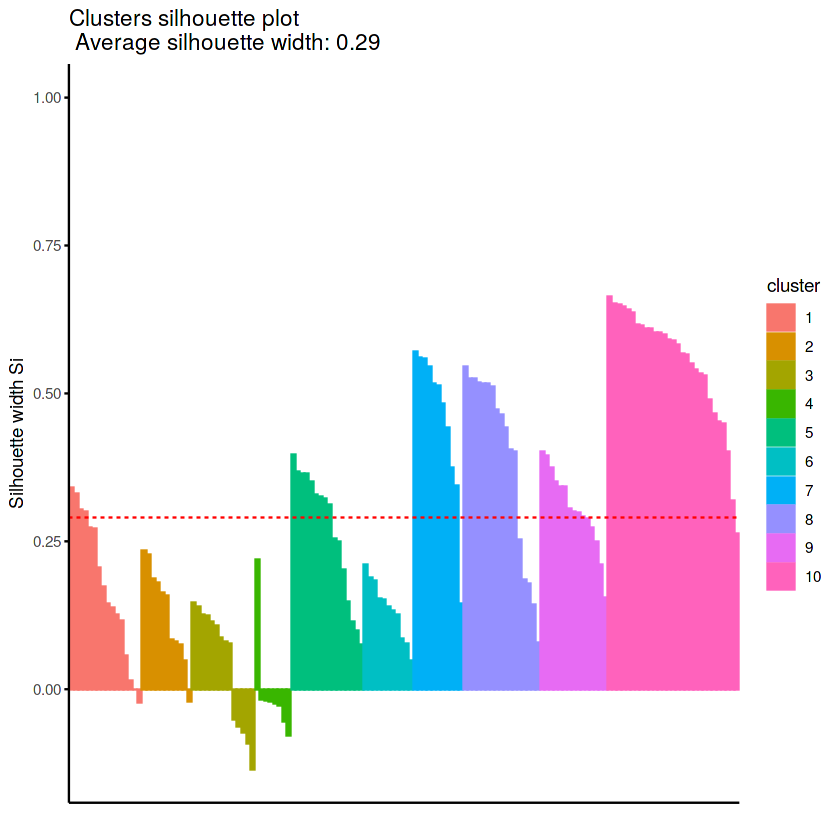

In [173]:
fviz_silhouette(sil.obj = sil10k, print.summary = TRUE,
                ggtheme = theme_classic())

   cluster size ave.sil.width
1        1   16          0.17
2        2   11          0.13
3        3   14          0.04
4        4    8          0.00
5        5   16          0.27
6        6   11          0.14
7        7   11          0.46
8        8   17          0.39
9        9   15          0.31
10      10   29          0.55


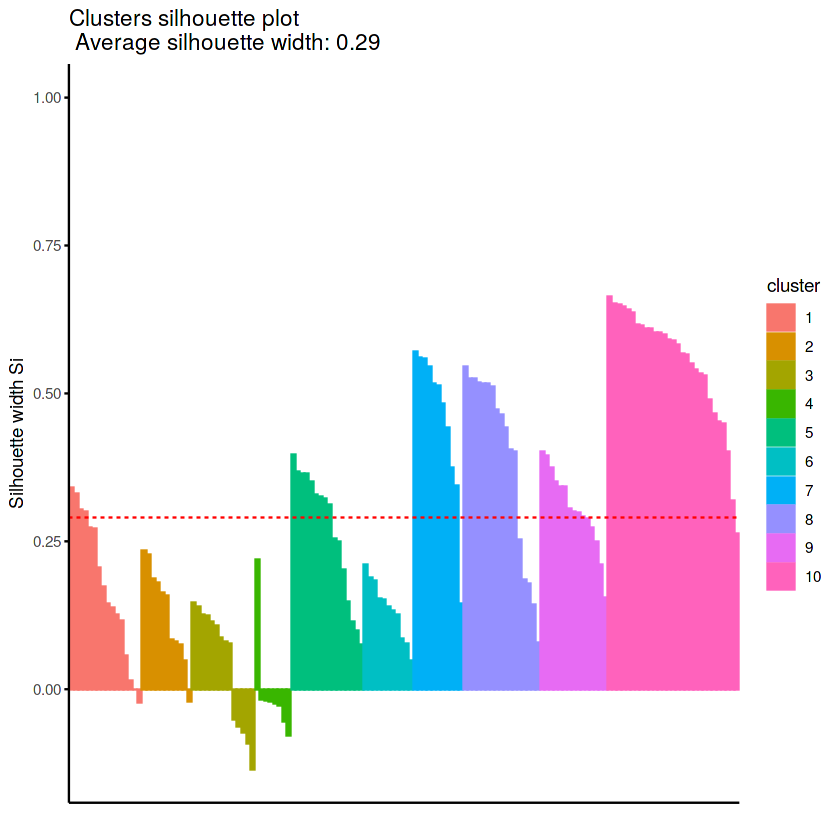

In [174]:
fviz_silhouette(sil.obj = sil10k, print.summary = TRUE,
                ggtheme = theme_classic())

In [176]:
pca.cluster.10k$centers

,class,fatigue,malaise,liver_big,liver_firm,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,0.8750000,0,0.2500,0.0000000,0.0000000,0.3125000,0.3154263,0.3591700,0.1901042,0.5576997,0.5037017,0.81250000
2,1.0000000,0,0.0000,1.0000000,0.4545455,0.0000000,0.3038488,0.4719963,0.4665978,0.4772727,0.4923246,0.45454545
3,0.9285714,1,1.0000,0.5714286,0.0000000,0.6428571,0.1663720,0.3497128,0.2152742,0.5637297,0.6511184,0.50000000
4,0.3750000,0,0.8750,0.5000000,0.1250000,0.0000000,0.3573801,0.3083456,0.4109848,0.4513931,0.4206746,0.25000000
5,0.0000000,0,0.0625,1.0000000,0.6250000,0.1875000,0.4092223,0.3508931,0.2239678,0.3058157,0.2860395,0.93750000
6,0.9090909,0,1.0000,1.0000000,0.5454545,0.7272727,0.2979824,0.3274579,0.3391873,0.5179160,0.5281193,1.00000000
7,0.9090909,1,1.0000,1.0000000,1.0000000,0.9090909,0.2099858,0.2733626,0.1253444,0.5950239,0.6143001,1.00000000
8,0.8823529,0,0.0000,1.0000000,0.8235294,1.0000000,0.2155071,0.2832559,0.2205882,0.5774162,0.5825513,0.05882353
9,1.0000000,0,1.0000,0.8666667,0.5333333,1.0000000,0.1840431,0.2108671,0.1714646,0.6125000,0.6737485,0.00000000
10,1.0000000,1,1.0000,0.9655172,1.0000000,1.0000000,0.1729600,0.1974281,0.2028820,0.6602611,0.6985967,0.00000000


### PAM

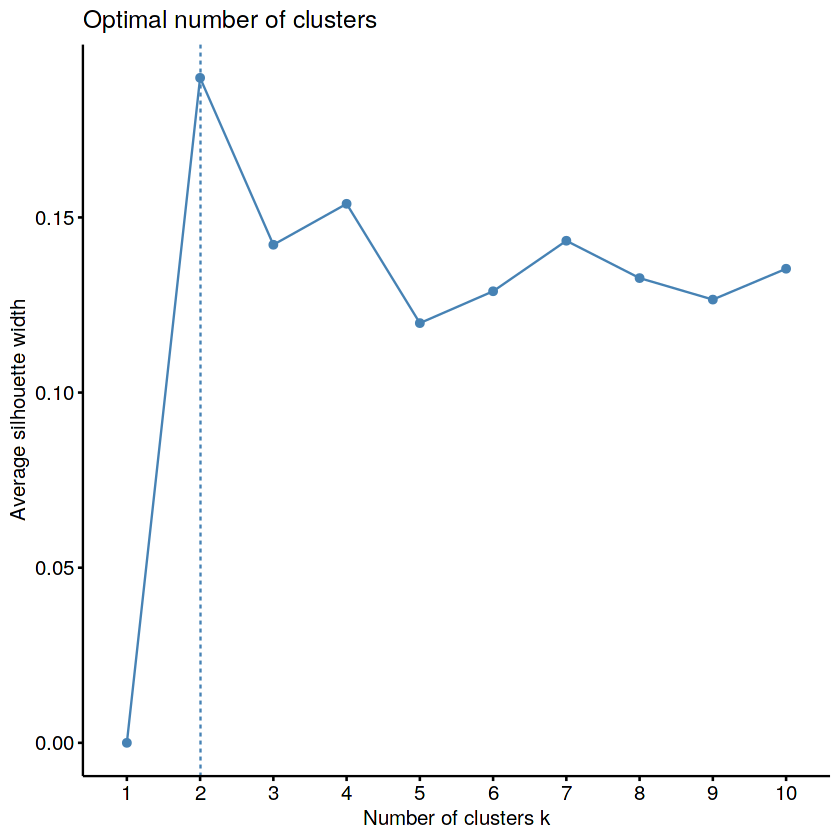

In [77]:
fviz_nbclust(datos.scaled, pam)

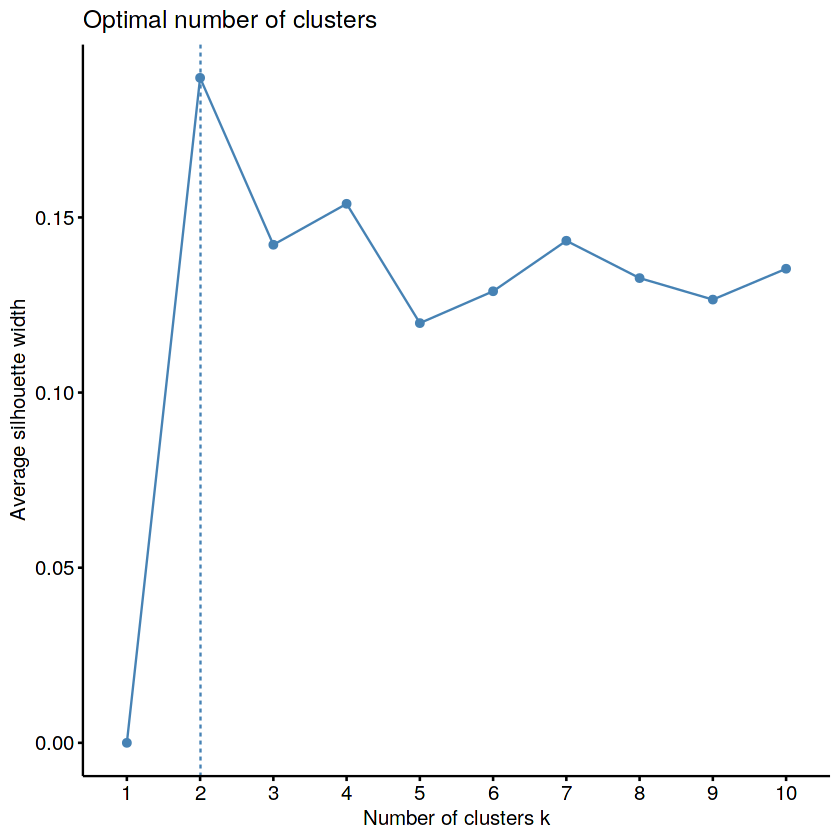

In [78]:
 fviz_nbclust(datos.scaled, pam, method = "silhouette")

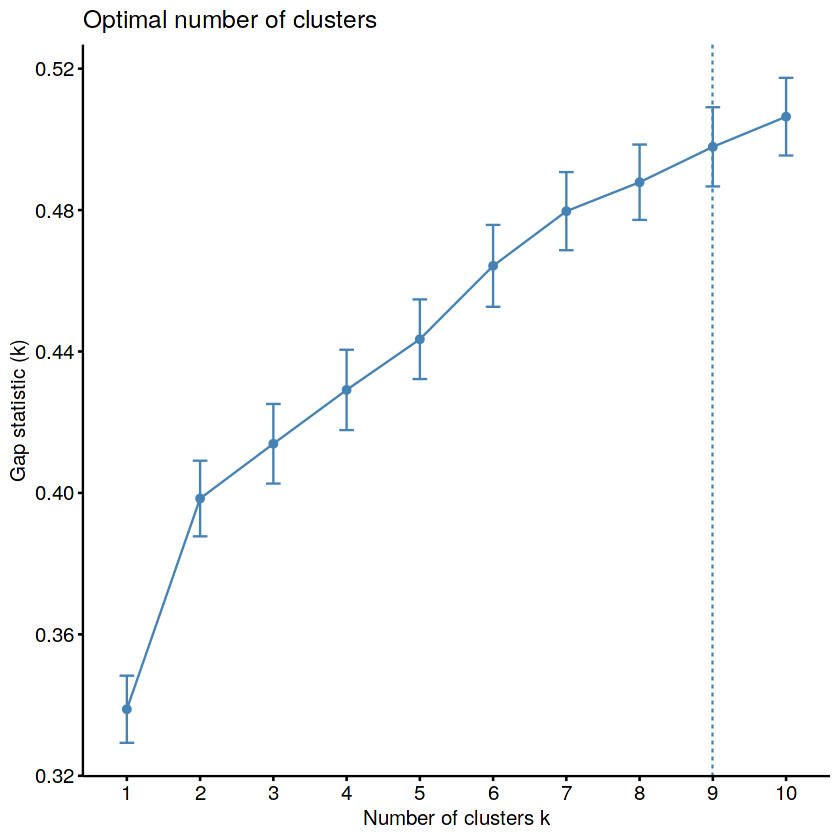

In [79]:
 fviz_nbclust(datos.scaled, pam, method = "gap_stat")

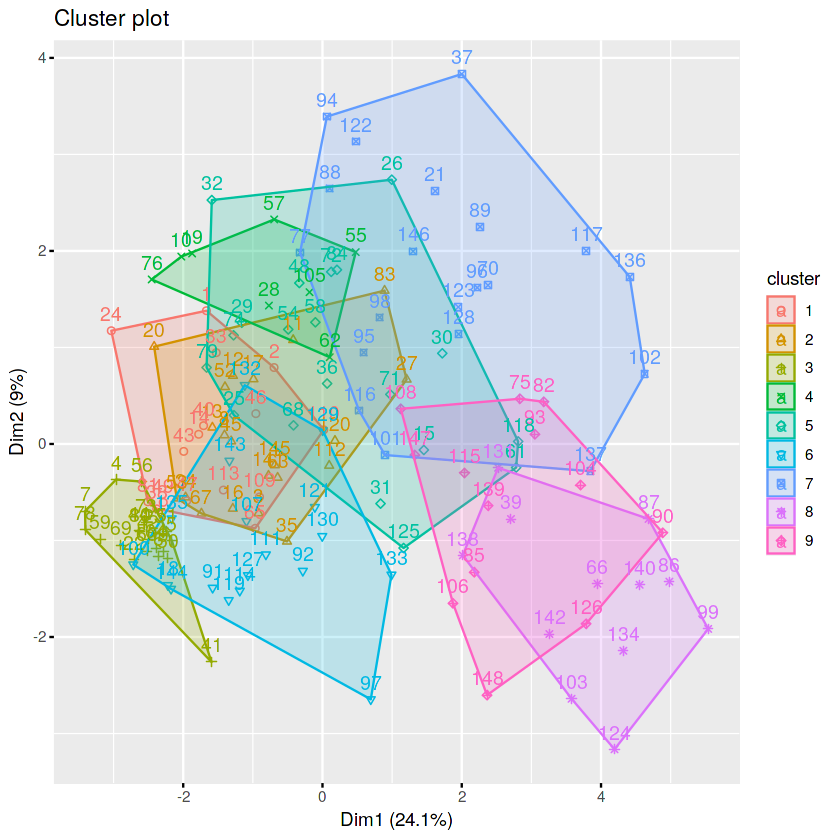

In [80]:
pam.res <- pam(datos.scaled, 9)
# Visualize
fviz_cluster(pam.res)

In [81]:
pam.sil = silhouette(pam.res$cluster, dist(datos.scaled))

  cluster size ave.sil.width
1       1   16          0.05
2       2   21          0.00
3       3   20          0.58
4       4    8          0.09
5       5   20          0.09
6       6   18          0.01
7       7   20          0.06
8       8   12          0.12
9       9   13          0.07


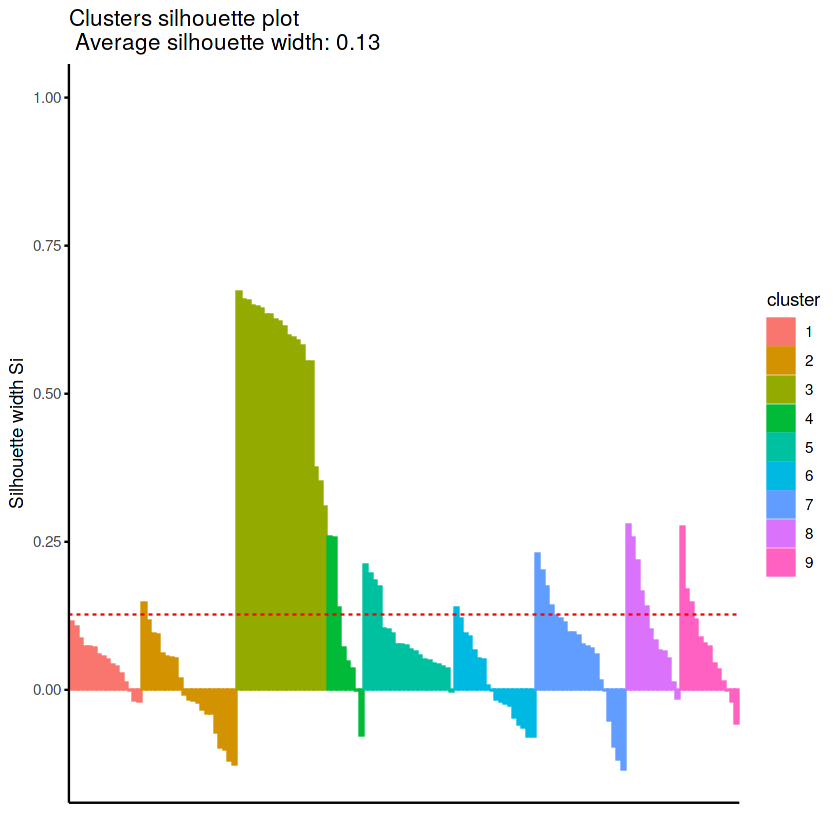

In [108]:
fviz_silhouette(sil.obj = pam.sil, print.summary = TRUE,
                ggtheme = theme_classic())